# Introduction

**Background Project**: \
Olist is the largest department store in Brazilian marketplaces/e-commerce. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using **Olist** logistics partners.

**Objective**: \
Build recommendation system to increase sales by give suggestion products with purposes to reduce browsing time and make the customer purchase faster.

**Expected Output**: \
Could exploit the data to give best recommendation system in order to give each user's individual tastes and preferences.

Dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
Website: www.olist.com

___
Problem:
- A well-known customer success law, the Pareto principle says that repeat customers generate revenue that is nearly **16 times more efficient than one-time customers**. The potency of 80/20 is that 20 percent of a group is responsible for 80 percent of the sales. It also can be 85 / 20 or 66 / 10. In other words, **the majority of the results (or outputs) are almost always caused by only a few inputs**.
- Anderson made measures in many industries and found a stunningly similar trend outlining a **shift from selling a few hits in huge volumes toward selling numerous niche items**, each of them in relatively small amounts.
- Though digital shelf space is unlimited, consumers’ time and attention remain finite, so **creators have to spend more and more resources to try to stand** out.

Solution:
- Customers demand personalization: Modern customers are becoming more interested in products and services that seem unique and **fit their individual needs and tastes**, creating more demand for a greater number of more unique items.
- The astounding thing is that if **one has enough user-to-product data (ratings, purchases, etc…)**, then **no other information is necessary to make decent recommendations**. This is **quite different than regression and classification problems** where one must explore various features in order to boost a model’s predictive powers.

Hence, by implementing a recommendation system that maintain customer retention and encourages repeat purchases, the likelihood of generating higher revenue increases significantly.
___
Source:
1. https://medium.com/creative-collisions/the-80-20-rule-paretos-principle-for-business-sales-marketing-and-operations-586af2533e68
2. https://medium.com/@a.marcel/the-long-tail-challenge-and-the-e-commerce-business-66fd02ab57d8
3. https://marker.medium.com/the-failed-promise-of-the-long-tail-6ba8a3afb9b1
4. https://www.linkedin.com/pulse/bye-bye-pareto-principle-welcome-long-tail-bhupesh-kumar-pandey/
5. https://www.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/

# Load Library

In [2]:
import numpy as np
import pandas as pd
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns

#for collaborative filtering
import os
import math
import random

from surprise import accuracy, Reader, Dataset
from surprise import NormalPredictor, KNNBasic, SVD, SVDpp, CoClustering, SlopeOne, NMF, KNNBaseline
from surprise.model_selection import cross_validate, KFold, GridSearchCV, train_test_split


from collections import defaultdict

#for translation
#from deep_translator import GoogleTranslator

# Use any translator you like, in this example GoogleTranslator
#translated = GoogleTranslator(source='auto', target='de').translate("keep it up, you are awesome")  # output -> Weiter so, du bist großartig

import calendar
import spacy

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Translating & Merging All Dataframe

Since the limited resources & to shorten the process I have to translate & save it to file

In [3]:
# Reading the products file with portuguese languange
raw_path = '/Users/agagoks/Desktop/Dibimbing/Final Project/Final Project/Olist dataset/'
products_pt = pd.read_csv(raw_path + 'olist_products_dataset.csv')

# Create a new DataFrame with only the selected column
new_df = products_pt.copy()
#new_df = pd.DataFrame({'product_category_name': products_pt['product_category_name']})

# Drop NaN Values
nan_rows = new_df[new_df.isna().any(axis=1)]
missing_val = len(nan_rows)/len(products_pt)*100
print(f"There are {missing_val:.2f}% percentage of missing value, hence I drop it")
new_df.dropna(inplace=True)

#Re-checking
missing_values = new_df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print(f"Missing values found in the following columns: {missing_values}")

There are 1.85% percentage of missing value, hence I drop it
No missing values found.


In [4]:
translation_dict = {
    'perfumaria': 'Perfumery',
    'artes': 'Arts',
    'esporte_lazer': 'Sports & Leisure',
    'bebes': 'Babies',
    'utilidades_domesticas': 'Household Utilities',
    'instrumentos_musicais': 'Musical Instruments',
    'cool_stuff': 'Cool Stuff',
    'moveis_decoracao': 'Furniture & Decor',
    'eletrodomesticos': 'Home Appliances',
    'brinquedos': 'Toys',
    'cama_mesa_banho': 'Bed, Table & Bath',
    'construcao_ferramentas_seguranca': 'Construction, Tools & Safety',
    'informatica_acessorios': 'Computers & Accessories',
    'beleza_saude': 'Beauty & Health',
    'malas_acessorios': 'Bags & Accessories',
    'ferramentas_jardim': 'Tools & Garden',
    'moveis_escritorio': 'Office Furniture',
    'automotivo': 'Automotive',
    'eletronicos': 'Electronics',
    'fashion_calcados': 'Fashion & Footwear',
    'telefonia': 'Telephony',
    'papelaria': 'Stationery',
    'fashion_bolsas_e_acessorios': 'Fashion Bags & Accessories',
    'pcs': 'Personal Computers',
    'casa_construcao': 'Home & Construction',
    'relogios_presentes': 'Watches & Gifts',
    'construcao_ferramentas_construcao': 'Construction Tools',
    'pet_shop': 'Pet Shop',
    'eletroportateis': 'Small Home Appliances',
    'agro_industria_e_comercio': 'Agro, Industry & Commerce',
    'moveis_sala': 'Living Room Furniture',
    'sinalizacao_e_seguranca': 'Signage & Safety',
    'climatizacao': 'Air Conditioning',
    'consoles_games': 'Consoles & Games',
    'livros_interesse_geral': 'Books (General Interest)',
    'construcao_ferramentas_ferramentas': 'Construction Tools',
    'fashion_underwear_e_moda_praia': 'Fashion Underwear & Beachwear',
    'fashion_roupa_masculina': 'Mens Fashion',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'Kitchen, Service Area, Dining & Garden Furniture',
    'industria_comercio_e_negocios': 'Industry, Commerce & Business',
    'telefonia_fixa': 'Landline Telephony',
    'construcao_ferramentas_iluminacao': 'Construction Tools & Lighting',
    'livros_tecnicos': 'Technical Books',
    'eletrodomesticos_2': 'Home Appliances 2',
    'artigos_de_festas': 'Party Supplies',
    'bebidas': 'Beverages',
    'market_place': 'Marketplace',
    'la_cuisine': 'Kitchenware',
    'construcao_ferramentas_jardim': 'Construction Tools & Garden',
    'fashion_roupa_feminina': 'Womens Fashion',
    'casa_conforto': 'Home Comfort',
    'audio': 'Audio',
    'alimentos_bebidas': 'Food & Beverages',
    'musica': 'Music',
    'alimentos': 'Food',
    'tablets_impressao_imagem': 'Tablets & Printing Images',
    'livros_importados': 'Imported Books',
    'portateis_casa_forno_e_cafe': 'Portable Home Ovens & Coffee Machines',
    'fashion_esporte': 'Fashion & Sports',
    'artigos_de_natal': 'Christmas Articles',
    'fashion_roupa_infanto_juvenil': 'Childrens & Youth Fashion',
    'dvds_blu_ray': 'DVDs & Blu-rays',
    'artes_e_artesanato': 'Arts & Crafts',
    'pc_gamer': 'Gaming PC',
    'moveis_quarto': 'Bedroom Furniture',
    'cine_foto': 'Cinema & Photography',
    'fraldas_higiene': 'Diapers & Hygiene',
    'flores': 'Flowers',
    'casa_conforto_2': 'Home Comfort 2',
    'portateis_cozinha_e_preparadores_de_alimentos': 'Portable Kitchen & Food Processors',
    'seguros_e_servicos': 'Insurance & Services',
    'moveis_colchao_e_estofado': 'Mattresses & Upholstery Furniture',
    'cds_dvds_musicais': 'CDs, DVDs & Music Albums'
}

#new_df['product_category_name'] = new_df['product_category_name'].map(translation_dict)

# Save the selected column to a new CSV file
#new_file_path = '/Users/agagoks/Desktop/Dibimbing/Final Project/Final Project/Olist dataset/olist_products_dataset_translated.csv'
#new_df.to_csv(new_file_path, index=False)

#print("Selected column saved to", new_file_path)

In [5]:
# Reading all the files
raw_path = '/Users/agagoks/Desktop/Dibimbing/Final Project/Final Project/Olist dataset/'
customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')
products = pd.read_csv(raw_path + 'olist_products_dataset_translated.csv')

In [6]:
# Collections for each dataset
datasets = [customer, geolocation, orders, order_items, order_payments,
            order_reviews, products, sellers]
names = ['customer', 'geolocation', 'orders', 'order_items', 'order_payments',
         'order_reviews', 'products', 'sellers']

In [7]:
# Creating a DataFrame for all datasets
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['perc_null'] = [df.isnull().sum().sum() / (df.shape[0]) for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()

,dataset,n_rows,n_cols,null_amount,perc_null,qty_null_columns,null_columns
0,customer,99441,5,0,0.000000,0,
1,geolocation,1000163,5,0,0.000000,0,
2,orders,99441,8,4908,0.049356,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,order_items,112650,7,0,0.000000,0,
4,order_payments,103886,5,0,0.000000,0,
5,order_reviews,99224,7,145903,1.470441,2,"review_comment_title, review_comment_message"
6,products,32340,9,0,0.000000,0,
7,sellers,3095,4,0,0.000000,0,


In [8]:
#Merge all the dataset into one dataframe
merged_df = orders.merge(order_items, on='order_id', how='left')
merged_df = merged_df.merge(order_payments, on='order_id', how='outer', validate='m:m')
merged_df = merged_df.merge(order_reviews, on='order_id', how='outer')
merged_df = merged_df.merge(products, on='product_id', how='outer')
merged_df = merged_df.merge(customer, on='customer_id', how='outer')
merged_df = merged_df.merge(sellers, on='seller_id', how='outer')

print(merged_df.shape)

(119143, 39)


In [9]:
#initial process only, turn off when ready to full throttle :)
#merged_df = merged_df.head(10000)

# EDA

In [10]:
#Show the dimension of each feature
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

In [11]:
#Show total products and category
print(f"Total Products: {merged_df['product_id'].nunique()}")

categories = merged_df.product_category_name.unique()
category = pd.DataFrame({'category': categories})
category.index += 1
print(f"Total Category: {category.value_counts().sum()}")

Total Products: 32951
Total Category: 72


In [12]:
merged_df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
count,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,116600.000000,116600.000000,116600.000000,116600.000000,116600.000000,116600.000000,116600.000000,119143.000000,118310.000000
mean,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,48.767401,785.967144,2.205154,2115.560343,30.317230,16.646904,23.116355,35033.451298,24442.410413
std,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,10.033529,652.586878,1.717458,3783.365701,16.221995,13.473632,11.757466,29823.198969,27573.004511
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,6429.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,13660.000000
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.250000,3.000000,1800.000000,38.000000,20.000000,30.000000,58475.000000,27972.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,99730.000000


## Q1: How is the rating score for scale 1-5?

### Count of Rating Score by Customer

In [125]:
#Create function for single countplot
def single_countplot(data, x, ax=None):
    sns.set(style="darkgrid")
    if ax is None:
        plt.figure(figsize=(12, 8))
    ax = sns.countplot(data=data, x=x, ax=ax)
    total = len(data)
    for p in ax.patches:
        count = p.get_height()
        percentage = count/total * 100
        x_pos = p.get_x() + p.get_width() / 2.
        y_pos = p.get_height()
        ax.text(x_pos, y_pos, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')
    plt.title("Count of Product Rating Score")
    plt.xlabel(x)
    plt.ylabel("Count")
    if ax is None:
        plt.show()

In [126]:
df_count_rating = merged_df.groupby('customer_unique_id').agg(count_rating=('review_score','count'))
df_count_rating_sort = df_count_rating.sort_values(by='count_rating', ascending=False)
df_count_rating_sort

,count_rating
customer_unique_id,
9a736b248f67d166d2fbb006bcb877c3,75
6fbc7cdadbb522125f4b27ae9dee4060,38
f9ae226291893fda10af7965268fb7f6,35
569aa12b73b5f7edeaa6f2a01603e381,26
c8460e4251689ba205045f3ea17884a1,24
...,...
5b976dd4f77ac841d7027290494b8dbe,1
5b96a6a7d5de5738179accb10c9af8aa,1
5b9603bf6b5ba113060bd41f770c725e,1


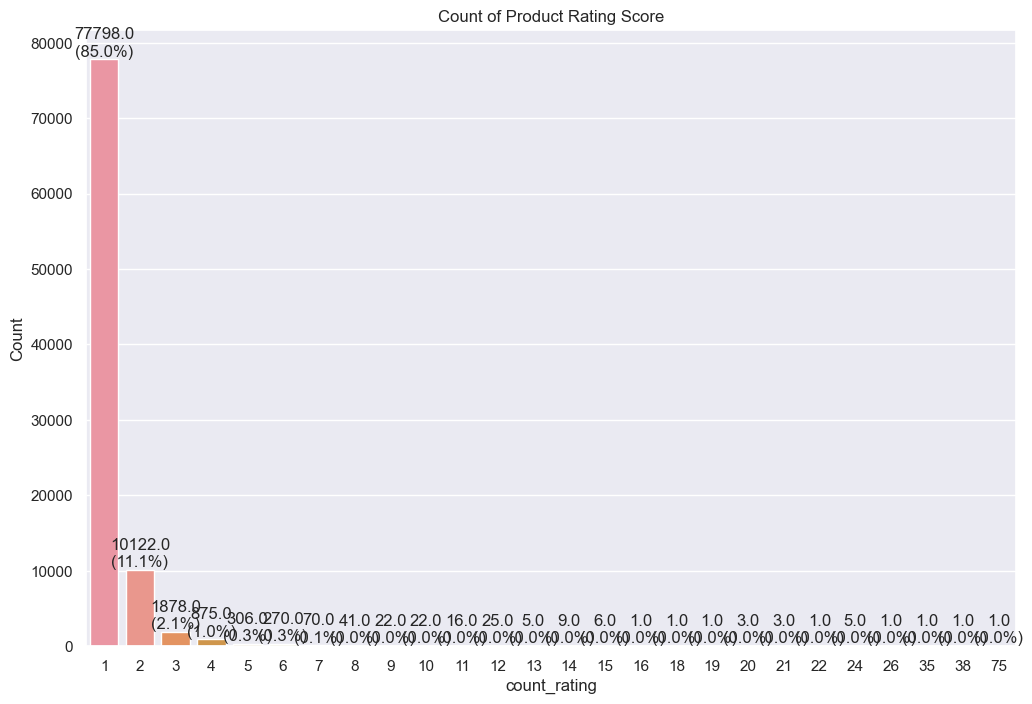

In [127]:
single_countplot(df_count_rating_sort, 'count_rating', ax=None)

Mostly rating score is 1 with almost 85% which seems it's likely came from the First-Time customer.

### Rating Score from 1 to 5

In [123]:
#Create function for countplot
def countplot(data, x, ax=None):
    sns.set(style="darkgrid")
    if ax is None:
        plt.figure(figsize=(12, 8))
    ax = sns.countplot(data=data, x=x, ax=ax)
    total = len(data)
    for p in ax.patches:
        count = p.get_height()
        percentage = count/total * 100
        x_pos = p.get_x() + p.get_width() / 2.
        y_pos = p.get_height()
        ax.text(x_pos, y_pos, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')
    plt.title("Distribution of Rating Score")
    plt.xlabel(x)
    plt.ylabel("Count")
    if ax is None:
        plt.show()

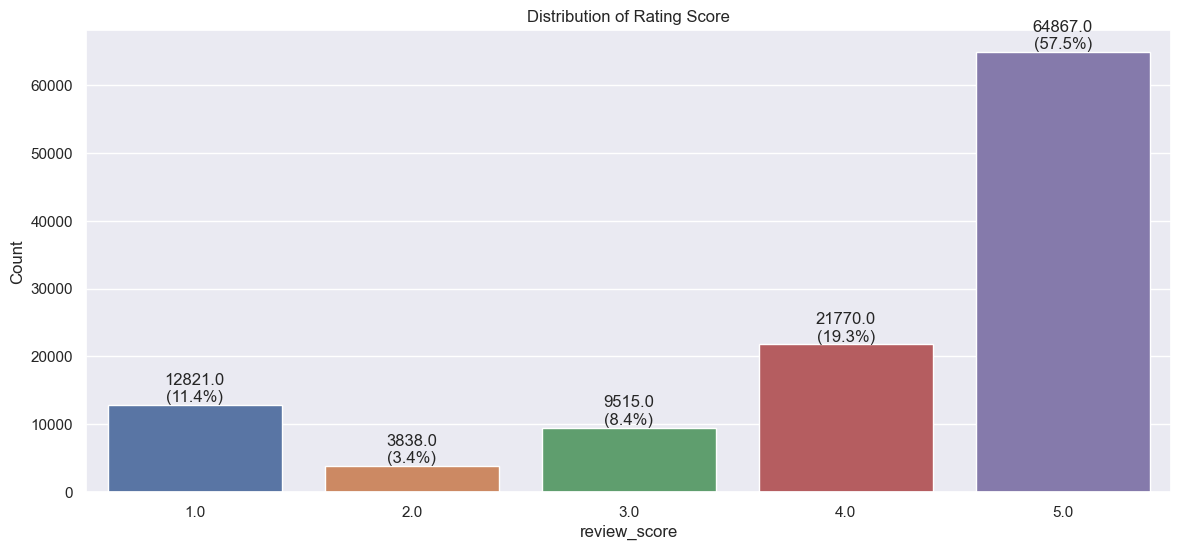

In [124]:
fig, ax = plt.subplots(figsize=(14, 6))
countplot(merged_df, x='review_score', ax=ax)
plt.show()

Customer given review score mostly on 5 star score, and for others have gradually lower score except for 1 star score had high score, furthermore I would inspect on the further step. In other hand since the customer already rated, we can use all of the data.

### Category Product with Rating Score of 1

In [15]:
ratings_cust = merged_df[merged_df['review_score']==1][['review_score', 'product_category_name']]
ratings_cust_group = ratings_cust.groupby('product_category_name').agg(tot_cat=('review_score', 'count'))
ratings_cust_group['tot_perc_cat'] = (ratings_cust_group['tot_cat'] / ratings_cust_group['tot_cat'].sum() * 100).round(1)
ratings_cust_rank = ratings_cust_group.sort_values(by='tot_perc_cat', ascending=False).head(10)
ratings_cust_rank

,tot_cat,tot_perc_cat
product_category_name,,
"Bed, Table & Bath",1724,11.8
Furniture & Decor,1303,9.0
Computers & Accessories,1199,8.2
Beauty & Health,1131,7.8
Sports & Leisure,1061,7.3
Household Utilities,869,6.0
Watches & Gifts,780,5.4
Tools & Garden,602,4.1
Telephony,600,4.1


/var/folders/17/pn2fwypx1qg13h_pjbf0t1ch0000gn/T/ipykernel_2276/2337547133.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bar_colors = plt.cm.get_cmap('tab20c').colors


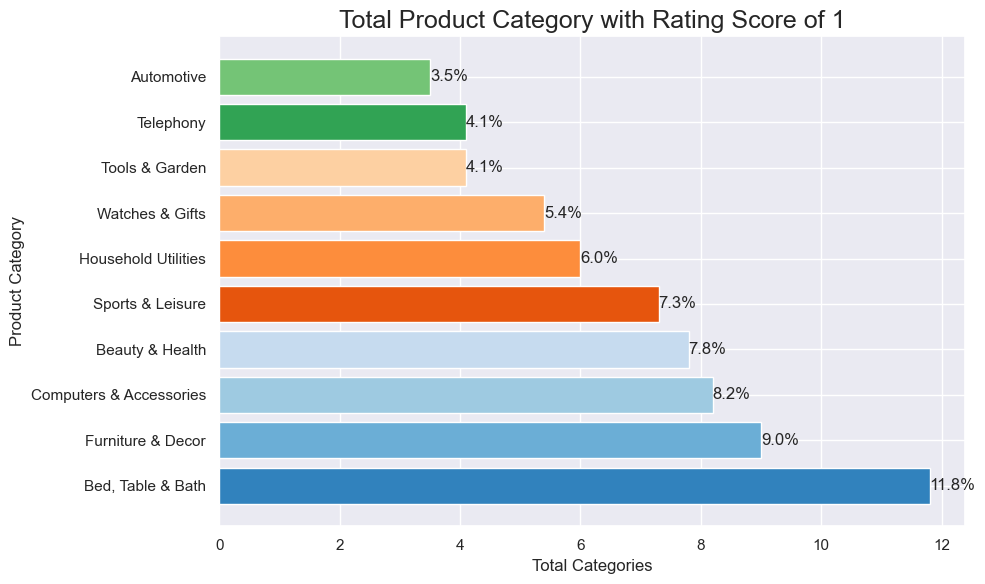

In [16]:
#Data
product_categories = ratings_cust_rank.index.tolist()
tot_perc_cat = ratings_cust_rank['tot_perc_cat'].tolist()

#Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_colors = plt.cm.get_cmap('tab20c').colors

#Horizontal bar plot
bars = ax.barh(product_categories, tot_perc_cat, color=bar_colors)

#Add data labels as percentages
for bar in bars:
    width = bar.get_width()
    label = f'{width:.1f}%'
    ax.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

#Set axis labels and title
ax.set_xlabel('Total Categories')
ax.set_ylabel('Product Category')
ax.set_title('Total Product Category with Rating Score of 1', fontsize=18)

plt.tight_layout()
plt.show()

Unfortunately the rating score of 1 of top 5 products on the figure are included in top 17 categories (which contribute ~80% transaction values), especially best selling product (Bed, Table & Bath). Hence there need to improvement the system of service to gain better experience of customers.

## Q2: How is the sales by category ?

### Top ~80% by 17 Categories from 72 Categories

In [17]:
category = merged_df.groupby(['product_category_name']).agg(
    total_trans_value=('payment_value', 'sum')).reset_index()
total_sum_cat = category['total_trans_value'].sum()
category_sorted = category.sort_values(by='total_trans_value', ascending=False).reset_index(drop=True)
category_sorted['acc_percent_trans_value'] = category_sorted['total_trans_value'].cumsum().div(total_sum_cat) * 100

category_sorted.index = category_sorted.index + 1
category_sorted['acc_category_count'] = category_sorted.index
category_sorted['acc_percent_cat_count'] = category_sorted['acc_category_count'].div(len(category_sorted.acc_category_count)) * 100

category_sorted.head(25)

,product_category_name,total_trans_value,acc_percent_trans_value,acc_category_count,acc_percent_cat_count
1,"Bed, Table & Bath",1743998.80,8.650292,1,1.388889
2,Beauty & Health,1662963.59,16.898648,2,2.777778
3,Computers & Accessories,1599481.06,24.832127,3,4.166667
4,Furniture & Decor,1443963.61,31.994235,4,5.555556
5,Watches & Gifts,1430553.48,39.089828,5,6.944444
6,Sports & Leisure,1400223.07,46.034981,6,8.333333
7,Household Utilities,1097900.09,51.480603,7,9.722222
8,Automotive,855095.68,55.721906,8,11.111111
9,Tools & Garden,840721.59,59.891913,9,12.500000
10,Cool Stuff,781933.97,63.770332,10,13.888889


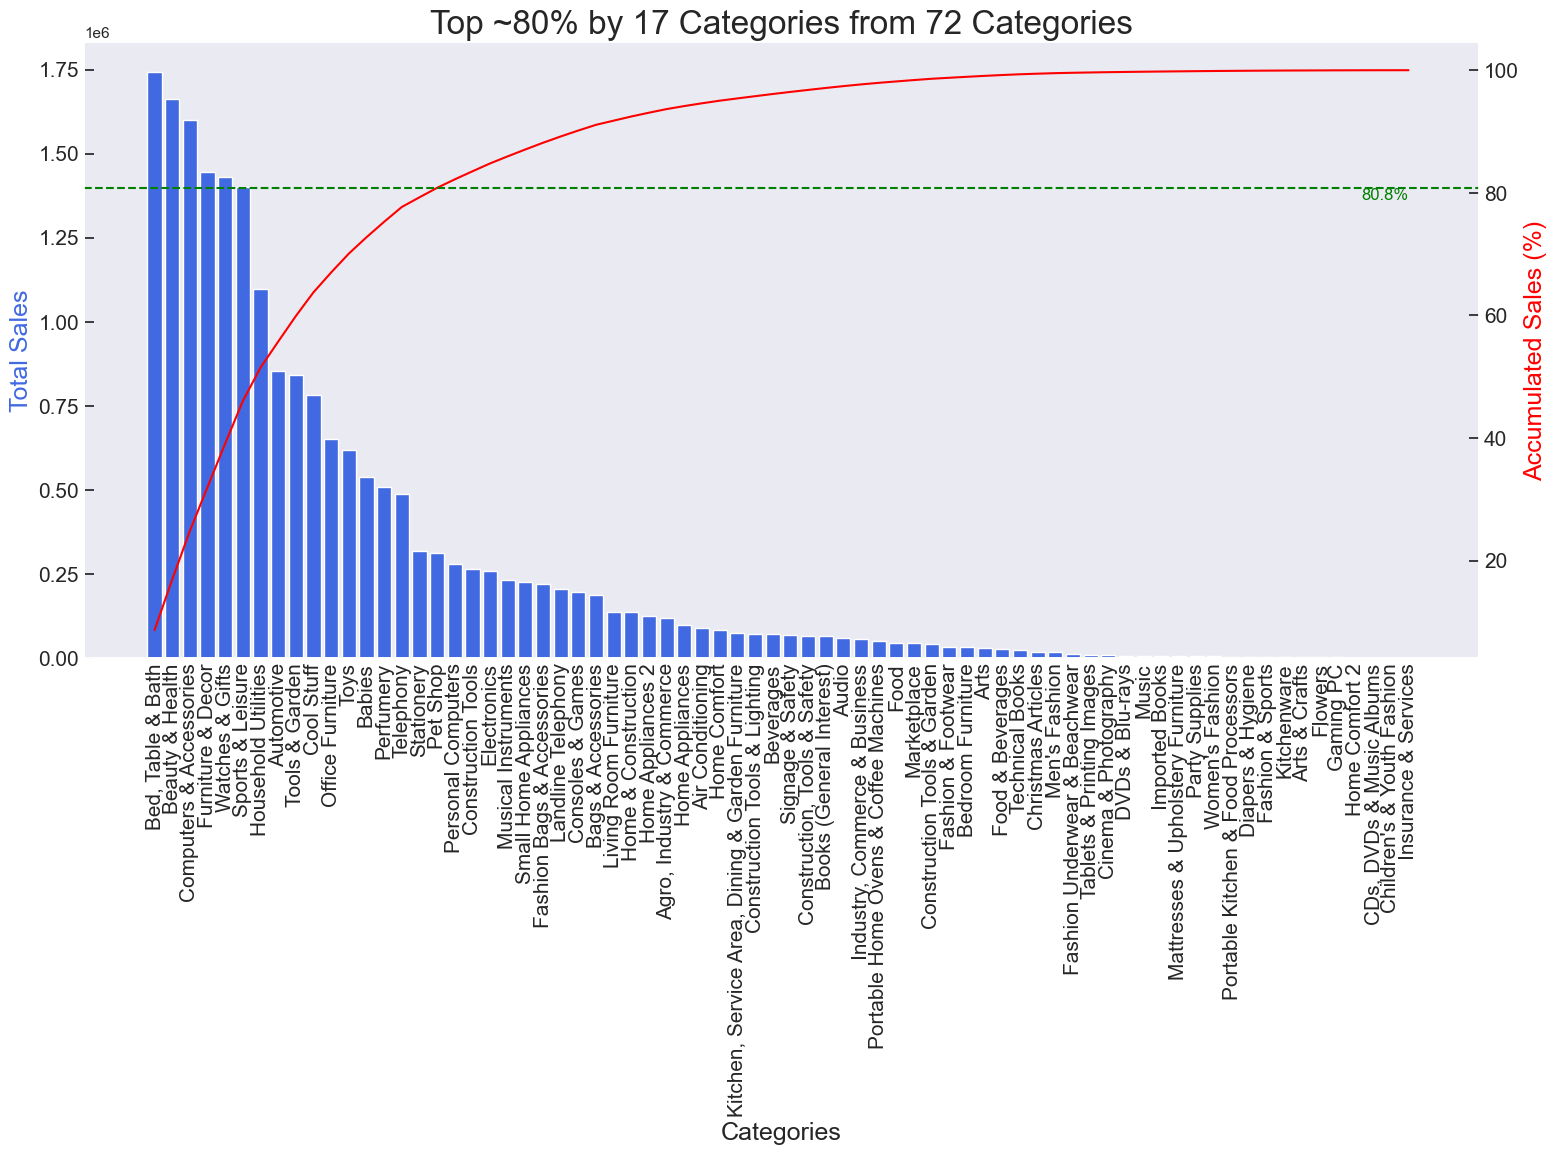

In [18]:
# Data
categories = category_sorted.product_category_name
bar_data = category_sorted.total_trans_value
line_data = category_sorted.acc_percent_trans_value

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot the barplot using Matplotlib
ax1.bar(categories, bar_data, color='#4169E1')
ax1.set_ylabel('Total Sales', color='#4169E1', fontsize=18)

# Set x-axis tick positions and labels
ax1.set_xticks(range(len(categories)))
ax1.set_xticklabels(categories, rotation=90, fontsize=12)  # Rotate x-labels
ax1.tick_params(direction='in', length=7)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the lineplot using Matplotlib
ax2.plot(categories, line_data, color='red')
ax2.set_ylabel('Accumulated Sales (%)', color='red', fontsize=18)
ax2.tick_params(direction='in', length=7)

# Customize the axes and labels
ax1.set_xlabel('Categories', fontsize=18)
all_cat = len(category_sorted.product_category_name)
ax1.set_title(f'Top ~80% by 17 Categories from {all_cat} Categories', fontsize=24)

# Gridlines
ax1.grid(axis='y', alpha=0)
ax2.grid(axis='y', alpha=0)
ax1.grid(axis='x', alpha=0)
ax2.grid(axis='x', alpha=0)

# Add the horizontal line
line_value = 80.8
ax2.axhline(y=line_value, color='green', linestyle='--')
ax2.text(len(categories) - 1, line_value, f'{line_value}%', va='top', ha='right', color='green')

# Set the font size for tick labels on both axes
ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)

# Display the chart
plt.show()

Based on volume/amount, 80% transaction value generated from 17 categories of product (head), meanwhile the rest still generated from 55 categories of product (tail). It shows that there are still a lot of opportunities to recommend other potential products based on customer interest and preferences.

### Top 17 Categories that Impact to ~80% Sales

In [19]:
category_sorted['ratio_cat_trans'] = category_sorted['acc_percent_trans_value']/category_sorted['acc_percent_cat_count']

top80_cat = category_sorted.loc[:, category_sorted.columns != "total_category_count"].head(17)
top80_cat

,product_category_name,total_trans_value,acc_percent_trans_value,acc_category_count,acc_percent_cat_count,ratio_cat_trans
1,"Bed, Table & Bath",1743998.80,8.650292,1,1.388889,6.228211
2,Beauty & Health,1662963.59,16.898648,2,2.777778,6.083513
3,Computers & Accessories,1599481.06,24.832127,3,4.166667,5.959711
4,Furniture & Decor,1443963.61,31.994235,4,5.555556,5.758962
5,Watches & Gifts,1430553.48,39.089828,5,6.944444,5.628935
6,Sports & Leisure,1400223.07,46.034981,6,8.333333,5.524198
7,Household Utilities,1097900.09,51.480603,7,9.722222,5.295148
8,Automotive,855095.68,55.721906,8,11.111111,5.014972
9,Tools & Garden,840721.59,59.891913,9,12.500000,4.791353
10,Cool Stuff,781933.97,63.770332,10,13.888889,4.591464


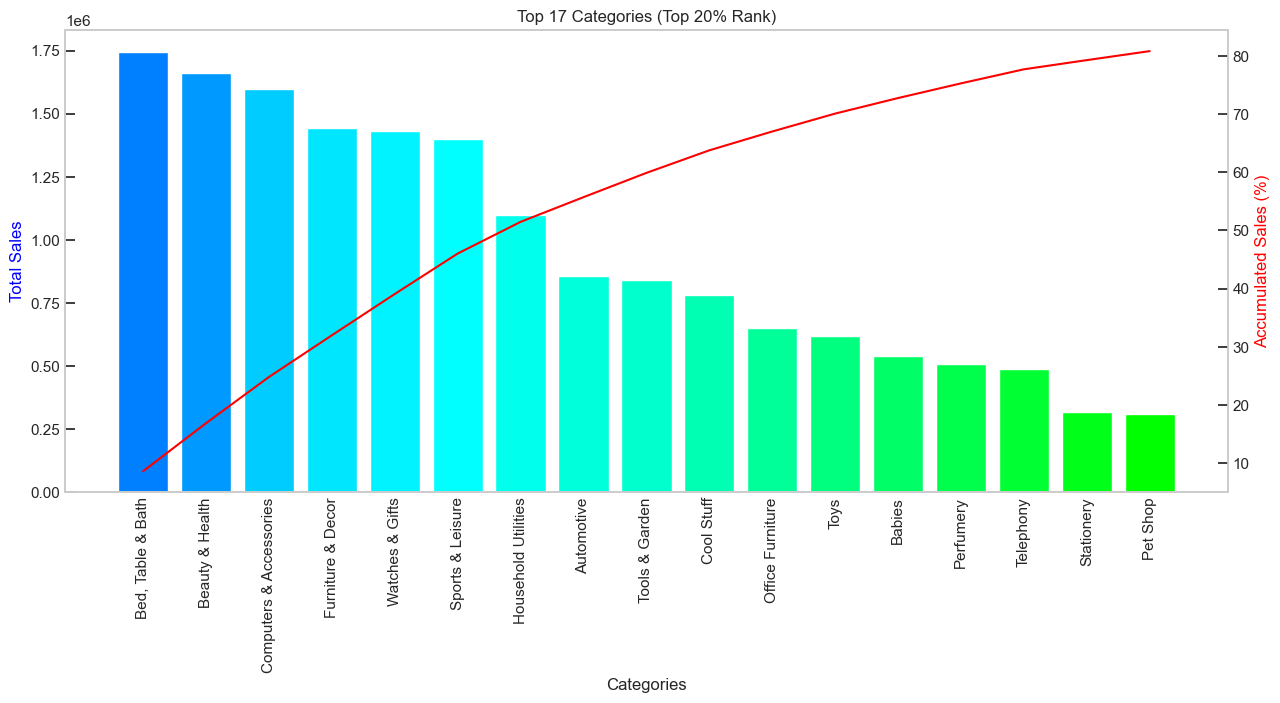

In [118]:
# Sample data
categories = top80_cat.product_category_name
bar_data = top80_cat.total_trans_value
line_data = top80_cat.acc_percent_trans_value

# Define a custom color palette
custom_palette = ['#007FFF', '#0099FF', '#00CCFF', '#00E6FF', '#00F3FF', '#00FFFF', '#00FFEC',
                  '#00FFDB', '#00FFCC', '#00FFB3', '#00FF99', '#00FF7F', '#00FF66', '#00FF4C',
                  '#00FF33', '#00FF19', '#00FF00']

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the barplot using Matplotlib
ax1.bar(categories, bar_data, color=custom_palette)
ax1.set_ylabel('Total Sales', color='blue')

# Set x-axis tick positions and labels
ax1.set_xticks(range(len(categories)))
ax1.set_xticklabels(categories, rotation=90)  # Rotate x-labels
ax1.tick_params(direction='in', length=7)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the lineplot using Seaborn
sns.lineplot(x=categories, y=line_data, color='red', ax=ax2)
ax2.set_ylabel('Accumulated Sales (%)', color='red')
ax2.tick_params(direction='in', length=7)

# Customize the axes and labels
ax1.set_xlabel('Categories')
ax1.set_title('Top 17 Categories (Top 20% Rank)')

# Gridlines
ax1.grid(axis='y', alpha=0)
ax2.grid(axis='y', alpha=0)
ax1.grid(axis='x', alpha=0)
ax2.grid(axis='x', alpha=0)

# Display the chart
plt.show()

On the top 3 there are Bed, Table & Bath; Beauty & Health; and Computer & Accesories, and 3 next top 3 there are Furniture & Decor; Watches & Gifts; and Sports & leisure. Meanwhile the rest categories are quite below ~860000.

## Q3: How is the monthly sales by top 17 category ?

In [21]:
#Create column of purchase of month
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'])
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['purchase_month'] = pd.DatetimeIndex(merged_df['order_purchase_timestamp']).month

In [22]:
#Define the category tables for each month
sales_df = merged_df.groupby(['product_category_name'])['payment_value'].sum()
best_sellers = sales_df.nlargest(17).index

best_df = merged_df[merged_df['product_category_name'].isin(best_sellers)]

best_monthly = best_df.pivot_table(index='product_category_name', columns='purchase_month', values='payment_value', aggfunc='sum')

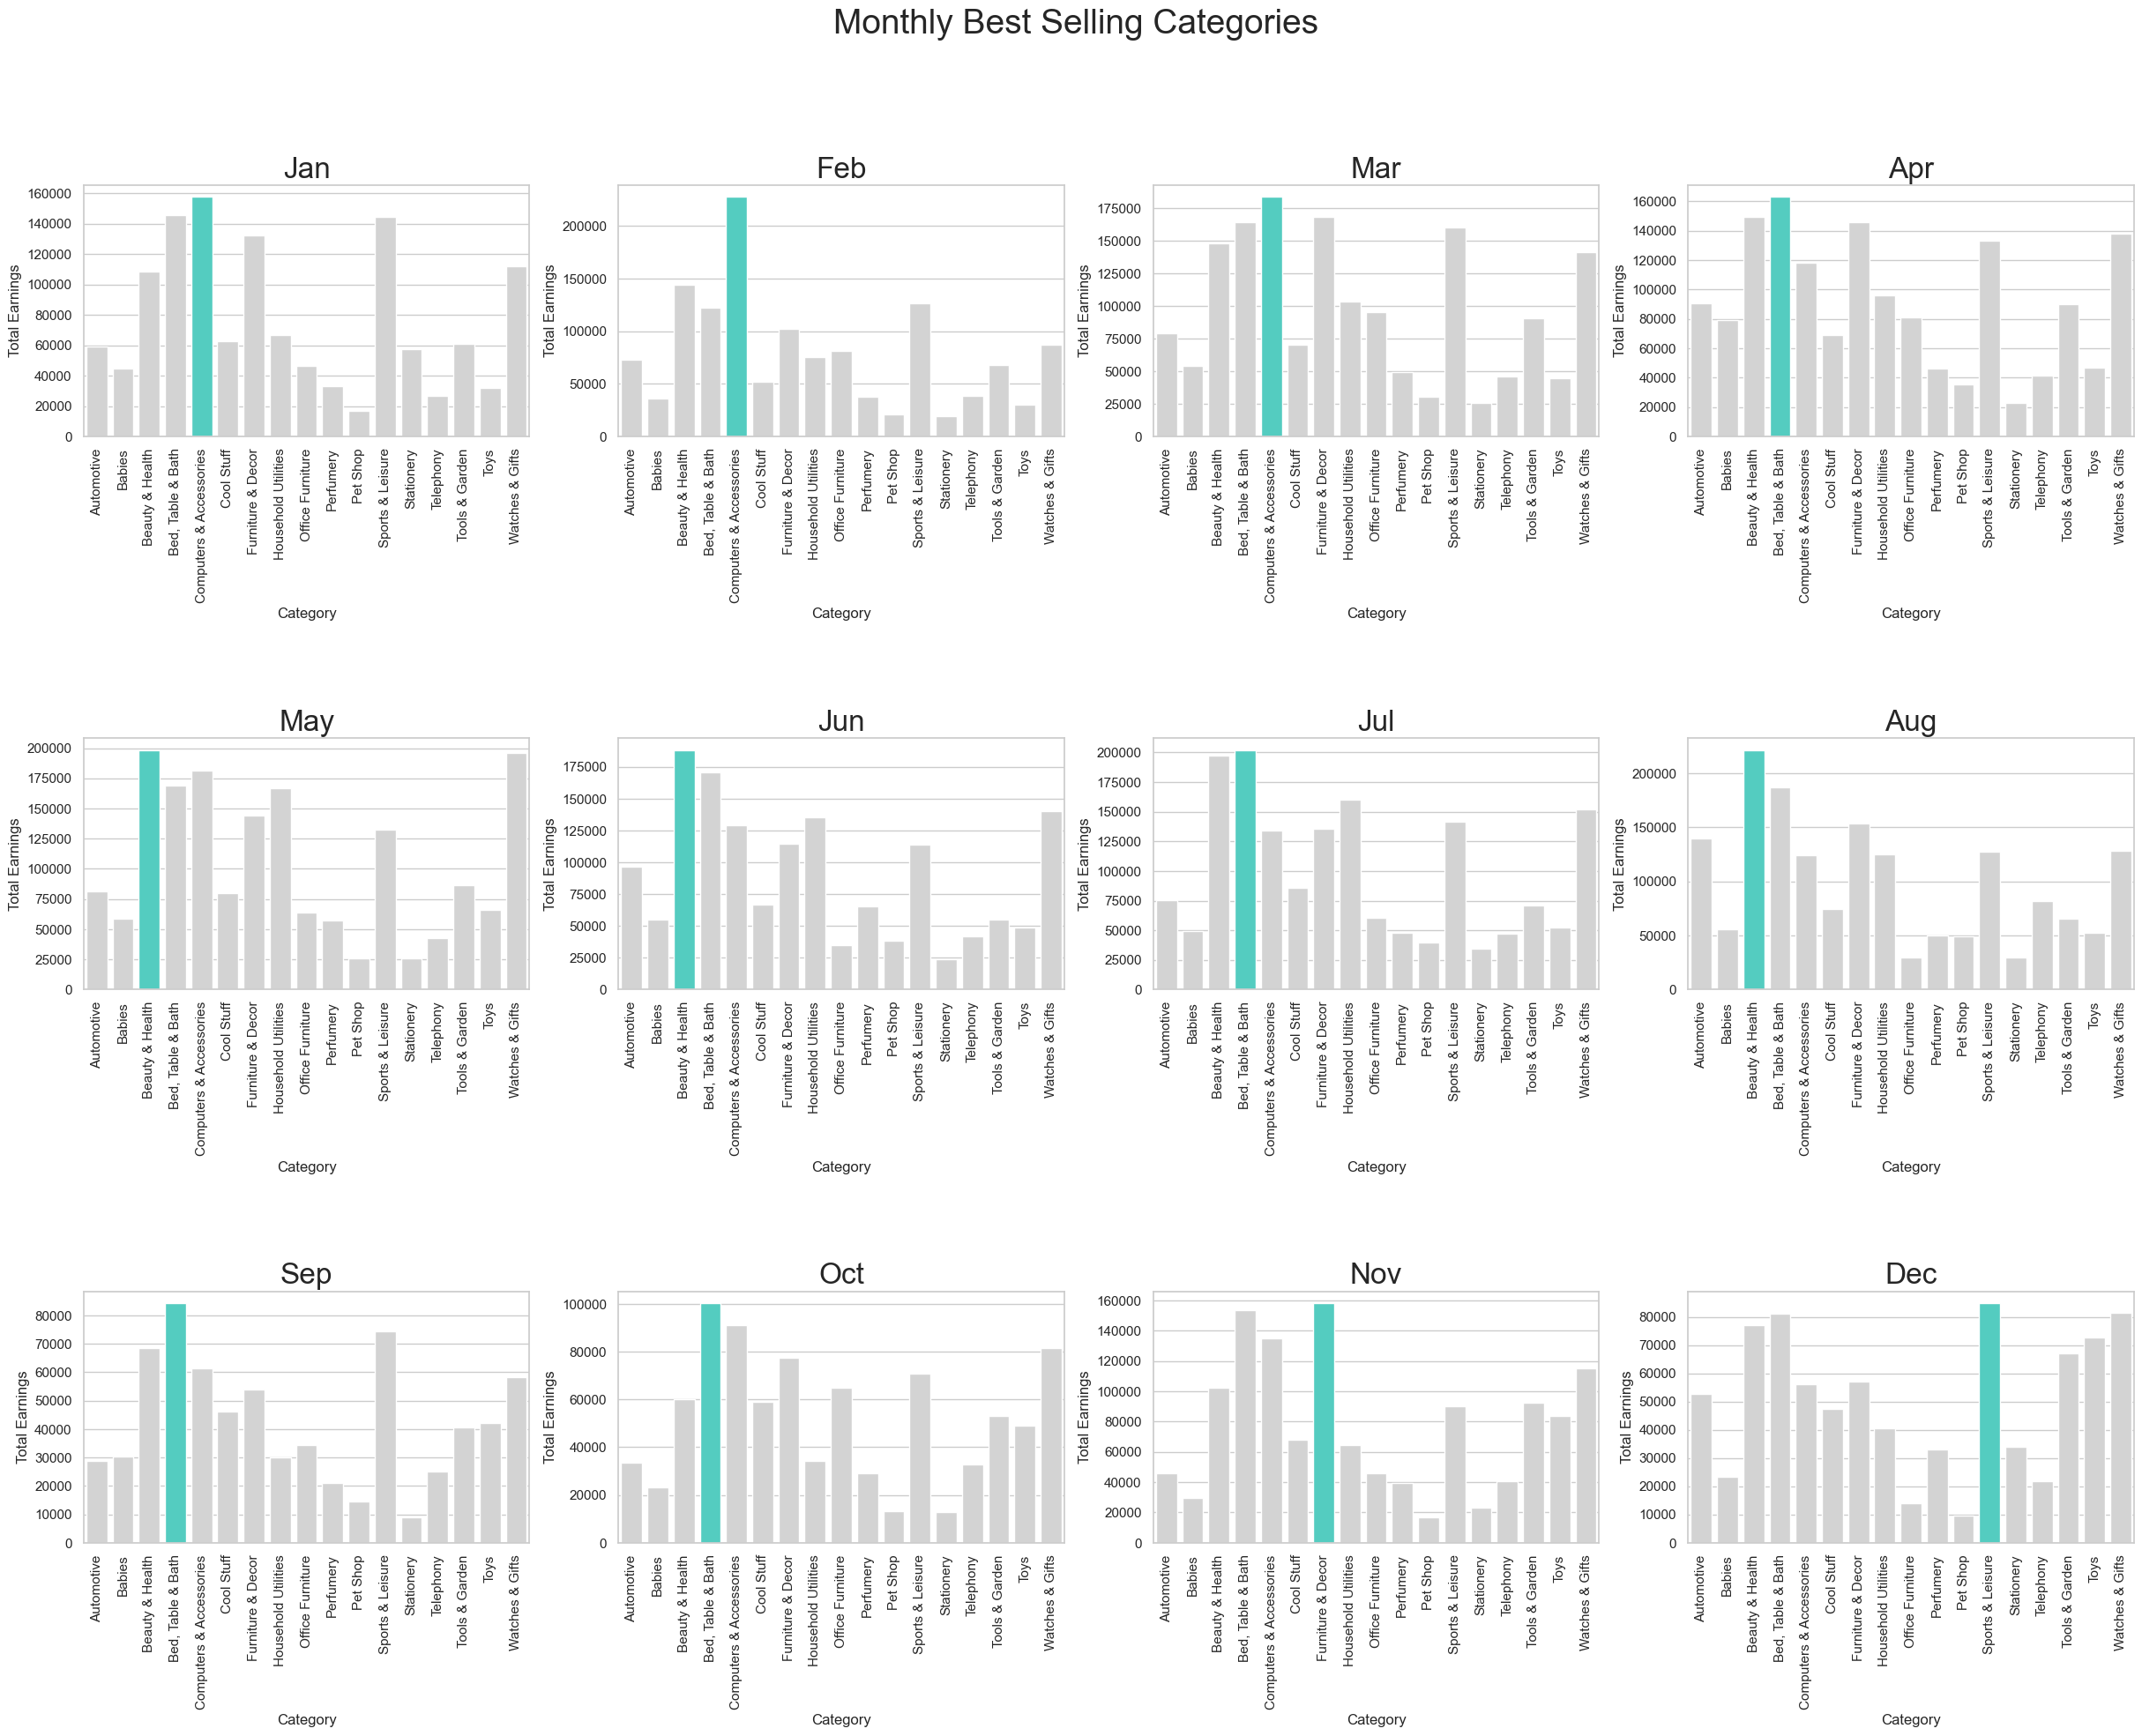

In [23]:
#Create custom palette for color of figure
def set_custom_palette(series, max_color='turquoise', other_color='lightgrey'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

#Create the figure
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 20))
plt.subplots_adjust(hspace=1.2)

months = sorted(best_monthly.columns)
month_names = [calendar.month_abbr[int(month)] for month in months]

for i, ax in enumerate(axes.flatten()):
    month_data = best_monthly[months[i]]
    palette = set_custom_palette(month_data, max_color='turquoise', other_color='lightgrey')
    sns.barplot(x=month_data.index, y=month_data.values, ax=ax, palette=palette)
    ax.set_title(month_names[i], fontsize=24)
    ax.set_xlabel('Category')
    ax.set_ylabel('Total Earnings')
    ax.tick_params(axis='x', rotation=90)

#Remove any empty subplots
if len(months) < len(axes.flatten()):
    for j in range(len(months), len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])

plt.suptitle('Monthly Best Selling Categories', fontsize=28)
plt.show()

As the figure previously, majority of category product for 4 months separately is from Bed, Table & Bath, and for 3 months consecutively is from Computer & Accessories, and last for 3 months separately is from Beauty & Health.
Hence for the other recommendation way I suggest to use this monthly top category product to stimulate first-time customer since still don't have their purchase data.

## Q4: How many products of the customer for each order ?

In [24]:
#Create amount of order for the same item
merged_df['ord_new'] = merged_df['order_item_id'].copy()

merged_df.loc[merged_df['order_item_id'].isin([7,8,9,10]), 'ord_new'] = '7 to 10'
merged_df.loc[(merged_df['order_item_id'] > 10), 'ord_new'] = '10 to 20'

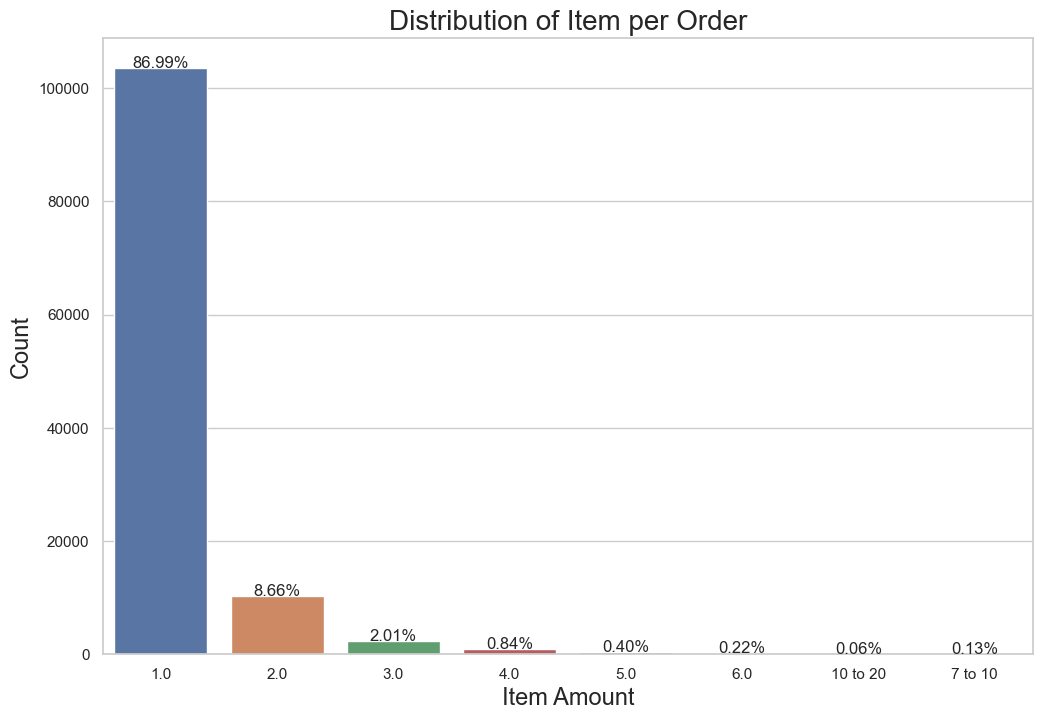

In [25]:
#Visualize feature or
plt.figure(figsize=(12,8))

g = sns.countplot(x='ord_new', data=merged_df)
g.set_title("Distribution of Item per Order", fontsize=20)
g.set_xlabel("Item Amount", fontsize=17)
g.set_ylabel("Count", fontsize=17)

sizes = []
total = len(merged_df)
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 

plt.show()

It seems that customer just only buy one type for each transaction with count almost 87%.

## Q5: How much likely first-time customer or repeated customer that bought 1, 2, 3 item per order ?

In [26]:
#Identify customers with more than one occurrence (Repeat Customer)
repeated = merged_df.groupby('customer_unique_id').filter(lambda x: len(x) > 1)
repeated['repeat'] = 'repeated'

#Identify customers with one occurrence (First Time Customer)
first = merged_df.groupby('customer_unique_id').filter(lambda x: len(x) == 1)
first['repeat'] = 'firsttime'

#Combine the two DataFrames into one
combined_df = pd.concat([repeated, first], ignore_index=True)

In [137]:
def howmany_order(order_item_id):
    howmany_order = combined_df[combined_df['order_item_id'] == order_item_id][['order_item_id', 'repeat']]
    howmany_order_group = howmany_order.groupby('repeat').agg(tot_repeat=('repeat', 'count'))
    
    # Add 'firsttime' to the groupby result if it is missing
    if 'firsttime' not in howmany_order_group.index:
        howmany_order_group.loc['firsttime'] = [0]
    
    howmany_order_group['tot_perc_one'] = (howmany_order_group['tot_repeat'] / howmany_order_group['tot_repeat'].sum() * 100).round(1)
    return howmany_order_group

In [138]:
howmany_order(1)

,tot_repeat,tot_perc_one
repeat,,
firsttime,80954,78.1
repeated,22691,21.9


In [139]:
howmany_order(2)

,tot_repeat,tot_perc_one
repeat,,
repeated,10317,100.0
firsttime,0,0.0


In [140]:
howmany_order(3)

,tot_repeat,tot_perc_one
repeat,,
repeated,2396,100.0
firsttime,0,0.0


In [145]:
def howmany_order_grouped_bar_plot(order_item_ids):
    # Initialize lists to store repeat values and totals for each order item
    repeat_values = []
    totals = []

    # Iterate over the order_item_ids
    for order_item_id in order_item_ids:
        # Filter the data based on the order_item_id
        order_group = howmany_order(order_item_id)

        # Reorder the rows to ensure consistent order in repeat values
        order_group = order_group.reindex(['firsttime', 'repeated'])

        # Append the repeat values and totals to the lists
        repeat_values.append(order_group.index.tolist())
        totals.append(order_group['tot_perc_one'].tolist())

    # Set the number of order items and repeat values
    num_order_items = len(order_item_ids)
    num_repeat_values = len(repeat_values[0])

    # Set the width of each bar
    bar_width = 0.8 / num_order_items

    # Set the x positions for the bars
    x = np.arange(num_repeat_values)

    # Set the colors for the bars
    bar_colors = ['blue', 'green', 'orange', 'red']  # Add more colors if needed

    # Set the figure size
    plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

    # Create the grouped bar plot
    for i in range(num_order_items):
        plt.bar(x + i * bar_width, totals[i], color=bar_colors[i], width=bar_width, alpha=0.5)

        # Add data labels on the bars
        for j, total in enumerate(totals[i]):
            plt.text(x[j] + i * bar_width, total, str(total), ha='center', va='bottom')

    # Add labels and titles
    plt.xlabel('Repeat')
    plt.ylabel('Total')
    plt.title('First-Time vs Repeated Customer of Count of Product Per Order')

    # Set the x-axis tick labels
    plt.xticks(x + bar_width * (num_order_items - 1) / 2, repeat_values[0])

    # Create a legend for the order items
    plt.legend(order_item_ids)

    # Display the plot
    plt.show()

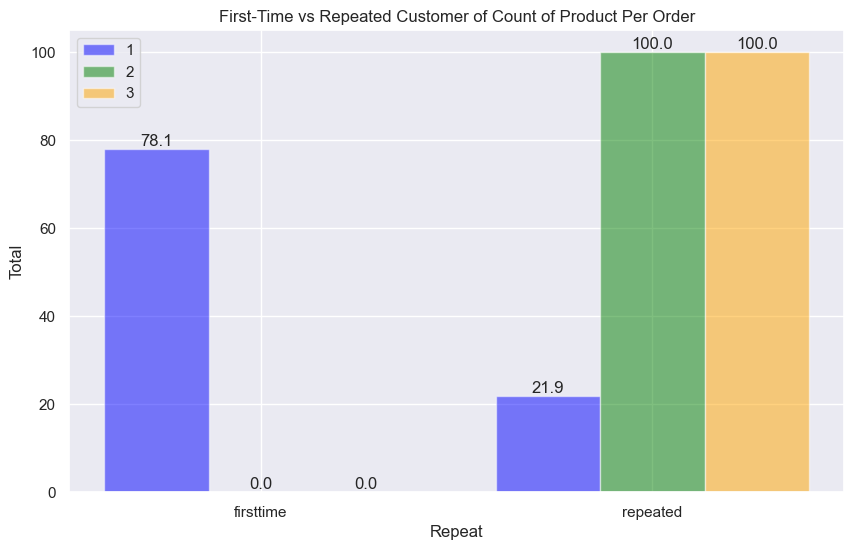

In [146]:
howmany_order_grouped_bar_plot([1, 2, 3])

Most likely the purchase of 1 product is come from first-time customer and the purchase of 2/3 products is come from repeated customer. Hence, it's obviously that if I can do suggest personalized buying experience to first-time customer based on their interest, then there would be more sales which in this cases to convert them to be repeated customer.

## Q6: Who are customers that have highest purchase amount of product and highest transaction value of product?

In [33]:
#Group the dataframe by amount of product and total transaction
customer_product_count = merged_df.groupby('customer_unique_id').agg(
    product_count=('order_item_id', 'count'),
    total_trans_value=('payment_value', 'sum')).reset_index()
customer_product_count = customer_product_count.sort_values(by='product_count', ascending=False).reset_index(drop=True)

In [34]:
#Highest total bought products  that only have total trans value around 556
top_10_proc = customer_product_count.sort_values(by='product_count',ascending=False).head(10)
top_10_proc

,customer_unique_id,product_count,total_trans_value
0,9a736b248f67d166d2fbb006bcb877c3,75,556.13
1,6fbc7cdadbb522125f4b27ae9dee4060,38,411.48
2,f9ae226291893fda10af7965268fb7f6,35,946.47
3,8af7ac63b2efbcbd88e5b11505e8098a,29,457.99
4,569aa12b73b5f7edeaa6f2a01603e381,26,62.68
5,5419a7c9b86a43d8140e2939cd2c2f7e,24,1333.80
6,85963fd37bfd387aa6d915d8a1065486,24,1758.88
7,90807fdb59eec2152bc977feeb6e47e7,24,215.70
8,d97b3cfb22b0d6b25ac9ed4e9c2d481b,24,19167.26
9,db1af3fd6b23ac3873ef02619d548f9c,24,658.44


In [35]:
#Highest total transaction value that only bought 8 products
top_10_transcv = customer_product_count.sort_values(by='total_trans_value',ascending=False).head(10)
top_10_transcv

,customer_unique_id,product_count,total_trans_value
161,0a0a92112bd4c708ca5fde585afaa872,8,109312.64
16,698e1cf81d01a3d389d96145f7fa6df8,20,45256.00
19,c402f431464c72e27330a67f7b94d4fb,20,44048.00
344,4007669dec559734d6f53e029e360987,6,36489.24
104,ef8d54b3797ea4db1d63f0ced6a906e9,10,30186.00
1330,763c8b1c9c68a0229c42c9fc6f662b93,4,29099.52
11,c8460e4251689ba205045f3ea17884a1,24,27935.46
28,eae0a83d752b1dd32697e0e7b4221656,15,25051.89
105,3d47f4368ccc8e1bb4c4a12dbda7111b,10,22346.60
316,adfa1cab2b2c8706db21bb13c0a1beb1,6,19457.04


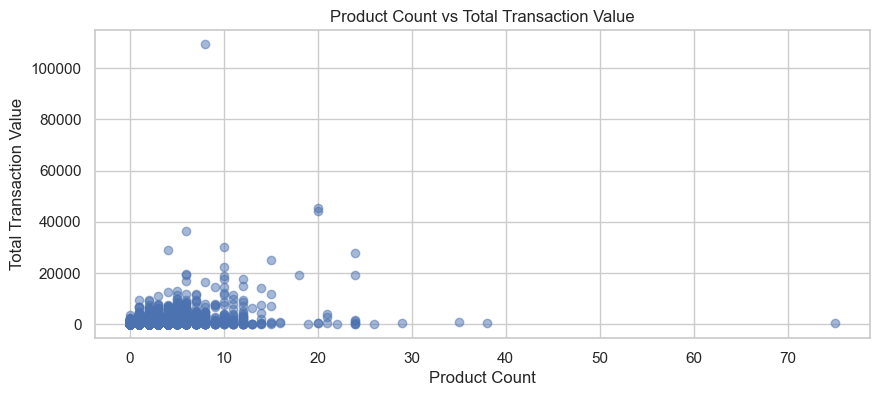

In [36]:
#Create scatter to show product count vs total transaction
plt.figure(figsize=(10, 4))
plt.scatter(
    customer_product_count['product_count'],
    customer_product_count['total_trans_value'],
    alpha=0.5
)
plt.xlabel('Product Count')
plt.ylabel('Total Transaction Value')
plt.title('Product Count vs Total Transaction Value')
plt.show()

There's 1 outliers in above 100,000 transaction value and above 70 product count, furthermore I need to inspect both of them.

In [37]:
def findinfo(cust_uniq_id):
    showinfo = merged_df[merged_df['customer_unique_id'] == cust_uniq_id][[
        'customer_unique_id', 'product_id', 'product_category_name', 'payment_value',
        'payment_type', 'order_id','order_item_id']].head(1)
    total_product = merged_df[merged_df['customer_unique_id'] == cust_uniq_id]['order_item_id'].count()
    showinfo['total_product'] = total_product
    per_product = merged_df.payment_value/total_product
    showinfo['per_product'] = per_product
    
    sum_trans_value = merged_df[merged_df['customer_unique_id'] == cust_uniq_id]['payment_value'].sum()
    showinfo['sum_trans_value'] = sum_trans_value
    return showinfo[['customer_unique_id','product_id','product_category_name','payment_type','sum_trans_value','total_product','per_product']]

top_10_transcv_list = top_10_transcv.customer_unique_id.tolist()

# Create an empty list to store the dataframes
dataframes = []

# Iterate over the list and append each dataframe to the list
for top_transcv in top_10_transcv_list: 
    info = findinfo(top_transcv)
    dataframes.append(info)

# Concatenate the dataframes in the list vertically
result = pd.concat(dataframes)

# Print the result
final = result.reset_index(drop=True)
final.index = final.index + 1
final

,customer_unique_id,product_id,product_category_name,payment_type,sum_trans_value,total_product,per_product
1,0a0a92112bd4c708ca5fde585afaa872,5769ef0a239114ac3a854af00df129e4,Landline Telephony,credit_card,109312.64,8,1708.010000
2,698e1cf81d01a3d389d96145f7fa6df8,9571759451b1d780ee7c15012ea109d4,Automotive,credit_card,45256.00,20,113.140000
3,c402f431464c72e27330a67f7b94d4fb,ee3d532c8a438679776d222e997606b3,Computers & Accessories,boleto,44048.00,20,110.120000
4,4007669dec559734d6f53e029e360987,c183fd5d2abf05873fa6e1014ed9e06c,"Agro, Industry & Commerce",boleto,36489.24,6,1013.590000
5,ef8d54b3797ea4db1d63f0ced6a906e9,0c9439abe84dc40a64fc164365c4d064,Beverages,boleto,30186.00,10,301.860000
6,763c8b1c9c68a0229c42c9fc6f662b93,19936fa4f614ee0590d3b77ac83fd648,Landline Telephony,boleto,29099.52,4,1818.720000
7,c8460e4251689ba205045f3ea17884a1,e7cc48a9daff5436f63d3aad9426f28b,Telephony,credit_card,27935.46,24,50.110000
8,eae0a83d752b1dd32697e0e7b4221656,90b58782fdd04cb829667fcc41fb65f5,Office Furniture,credit_card,25051.89,15,132.570000
9,3d47f4368ccc8e1bb4c4a12dbda7111b,47920da896bbd89e851429c78a7a7a8b,Office Furniture,credit_card,22346.60,10,223.466000
10,adfa1cab2b2c8706db21bb13c0a1beb1,cec51758e9839eb5414b214934430da6,Signage & Safety,credit_card,19457.04,6,540.473333


As show in figure before, 1st position of customer that have highest transaction value was bought product on category of landline telephone (13,664) for 8 times (~1708/product) and have payment using credit. Meanwhile as a comparison, 6th position of customer has same bought product category. Since there is no information about product name or product description, I need more information so that can validate if a huge transaction for landline telephones can be considered reasonable or not.

In [38]:
def findinfo(cust_uniq_id):
    showinfo = merged_df[merged_df['customer_unique_id'] == cust_uniq_id][[
        'customer_unique_id', 'product_id', 'product_category_name', 'payment_value',
        'payment_type', 'order_id','order_item_id']].head(1)
    total_product = merged_df[merged_df['customer_unique_id'] == cust_uniq_id]['order_item_id'].count()
    showinfo['total_product'] = total_product
    per_product = merged_df.payment_value/total_product
    showinfo['per_product'] = per_product
    
    sum_trans_value = merged_df[merged_df['customer_unique_id'] == cust_uniq_id]['payment_value'].sum()
    showinfo['sum_trans_value'] = sum_trans_value
    return showinfo[['customer_unique_id','product_id','product_category_name','payment_type','sum_trans_value','total_product','per_product']]

top_10_proc_list = top_10_proc.customer_unique_id.tolist()

# Create an empty list to store the dataframes
dataframes2 = []

# Iterate over the list and append each dataframe to the list
for top_proc in top_10_proc_list: 
    info = findinfo(top_proc)
    dataframes2.append(info)

# Concatenate the dataframes in the list vertically
result2 = pd.concat(dataframes2)

# Print the result
final2 = result2.reset_index(drop=True)
final2.index = final2.index + 1
final2

,customer_unique_id,product_id,product_category_name,payment_type,sum_trans_value,total_product,per_product
1,9a736b248f67d166d2fbb006bcb877c3,4eb99b5f0d7e411f246a5c9c0ae27a5e,Furniture & Decor,voucher,556.13,75,0.016933
2,6fbc7cdadbb522125f4b27ae9dee4060,0554911df28fda9fd668ce5ba5949695,Office Furniture,voucher,411.48,38,0.280526
3,f9ae226291893fda10af7965268fb7f6,5dddb31154cbd968caa4706ef0f4e0f0,Tools & Garden,voucher,946.47,35,0.194857
4,8af7ac63b2efbcbd88e5b11505e8098a,1aecdb5fa3add74e385f25c6c527a462,Tools & Garden,voucher,457.99,29,2.276552
5,569aa12b73b5f7edeaa6f2a01603e381,8d37ee446981d3790967d0268d6cfc81,"Bed, Table & Bath",voucher,62.68,26,0.064615
6,5419a7c9b86a43d8140e2939cd2c2f7e,4e53a453045707bbc5febcf5f32097ac,Computers & Accessories,credit_card,1333.80,24,6.914167
7,85963fd37bfd387aa6d915d8a1065486,11250b0d4b709fee92441c5f34122aed,"Agro, Industry & Commerce",voucher,1758.88,24,1.709583
8,90807fdb59eec2152bc977feeb6e47e7,eea3e07f864a0a1389726d8a5f31c3f6,Perfumery,voucher,215.70,24,0.435417
9,d97b3cfb22b0d6b25ac9ed4e9c2d481b,7094fadc9773845c7d453e51b04289a8,"Bed, Table & Bath",credit_card,19167.26,24,7.924167
10,db1af3fd6b23ac3873ef02619d548f9c,d1c427060a0f73f6b889a5c7c61f2ac4,Computers & Accessories,voucher,658.44,24,0.689167


In [39]:
merged_df[merged_df['customer_unique_id']=='9a736b248f67d166d2fbb006bcb877c3']['product_category_name'].unique()

array(['Furniture & Decor', 'Bed, Table & Bath', 'Household Utilities'],
      dtype=object)

In [40]:
merged_df[merged_df['customer_unique_id']=='9a736b248f67d166d2fbb006bcb877c3']['payment_type'].unique()

array(['voucher'], dtype=object)

As show in figure before, 1st position of customer was bought 75 products which of them are furniture & decor, bed, table & bath, and household utilities and have payment all of them using voucher. For additional information, top ten customer that have highest purchase amount of product are mostly bought using voucher. My assumption it seems they use vouchers to buy cheap products because usually the vouchers come from cashback, office bonuses or so on which has small value. For more precisely I need more information to gain better insight of these.

## Q7: How is transaction value of repeat customer vs new customer?

In [41]:
#Identify customers with more than one occurrence (Repeat Customer)
repeated = merged_df.groupby('customer_unique_id').filter(lambda x: len(x) > 1)
repeated['repeat'] = 'repeated'

#Identify customers with one occurrence (First Time Customer)
first = merged_df.groupby('customer_unique_id').filter(lambda x: len(x) == 1)
first['repeat'] = 'firsttime'

#Combine the two DataFrames into one
combined_df = pd.concat([repeated, first], ignore_index=True)

In [42]:
#Group customers into repeat customers and first-time customers
customer_repeatnew = combined_df.groupby('repeat').agg(
    cust_count=('customer_unique_id', 'count'),
    total_trans_value=('payment_value', 'sum')).reset_index()
customer_repeatnew = customer_repeatnew.sort_values(by='cust_count', ascending=False).reset_index(drop=True)

#Sum total transaction and create percentage version
total_sum_cat = customer_repeatnew['total_trans_value'].sum()
customer_repeatnew['percent_trans_value'] = (customer_repeatnew['total_trans_value'] / total_sum_cat) * 100

#Sum customer count for both and create percentage version
total_sum_cust = customer_repeatnew['cust_count'].sum()
customer_repeatnew['percent_cust_count'] = (customer_repeatnew['cust_count'] / total_sum_cust) * 100

#Show the dataframe
cust_repeatnew = customer_repeatnew[['repeat','cust_count','percent_cust_count','total_trans_value','percent_trans_value']]
cust_repeatnew

,repeat,cust_count,percent_cust_count,total_trans_value,percent_trans_value
0,firsttime,81601,68.489966,12419872.87,60.350222
1,repeated,37542,31.510034,8159791.14,39.649778


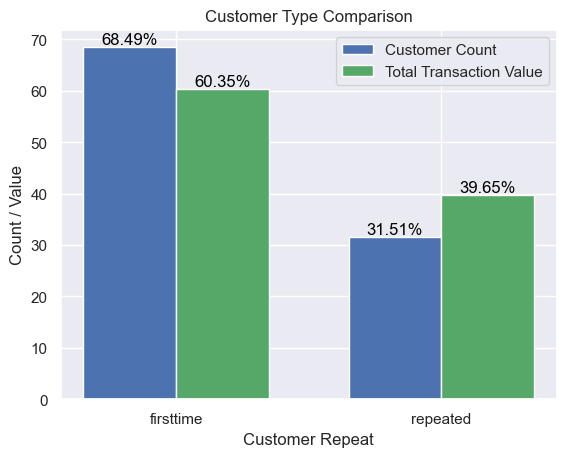

In [147]:
#Data
repeat = cust_repeatnew.repeat.tolist()
cust_count = cust_repeatnew.percent_cust_count.tolist()
total_trans_value = cust_repeatnew.percent_trans_value.tolist()

#Set the position of the bars
bar_width = 0.35
r1 = np.arange(len(repeat))
r2 = [x + bar_width for x in r1]

#Create the grouped bar chart
plt.bar(r1, cust_count, color='b', width=bar_width, label='Customer Count')
plt.bar(r2, total_trans_value, color='g', width=bar_width, label='Total Transaction Value')

#Set the x-axis labels and title
plt.xlabel('Customer Repeat')
plt.ylabel('Count / Value')
plt.title('Customer Type Comparison')

#Set the x-axis tick labels
plt.xticks([r + bar_width/2 for r in range(len(repeat))], repeat)

#Add value labels above the bars
for i, v in enumerate(cust_count):
    plt.text(i, v, f"{v:,.2f}%", ha='center', va='bottom', color='black')
    
for i, v in enumerate(total_trans_value):
    plt.text(i + bar_width, v, f"{v:,.2f}%", ha='center', va='bottom', color='black')

#Add a legend
plt.legend()

#Display the chart
plt.show()

From the grouped bar chart, it is evident that repeat customers have made multiple purchases of the product. This observation supports the notion that retaining customers and encouraging repeat purchases can lead to increased sales and revenue generation.

## Q8: How is the distribution for each features?

In [44]:
#Define numerical features
numericals = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [45]:
merged_df[numericals].describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,purchase_month
count,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,116600.000000,116600.000000,116600.000000,116600.000000,116600.000000,116600.000000,116600.000000,119143.000000,118310.000000,119143.000000
mean,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,48.767401,785.967144,2.205154,2115.560343,30.317230,16.646904,23.116355,35033.451298,24442.410413,6.033086
std,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,10.033529,652.586878,1.717458,3783.365701,16.221995,13.473632,11.757466,29823.198969,27573.004511,3.233819
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000,1.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,6429.000000,3.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,13660.000000,6.000000
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.250000,3.000000,1800.000000,38.000000,20.000000,30.000000,58475.000000,27972.000000,8.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,99730.000000,12.000000


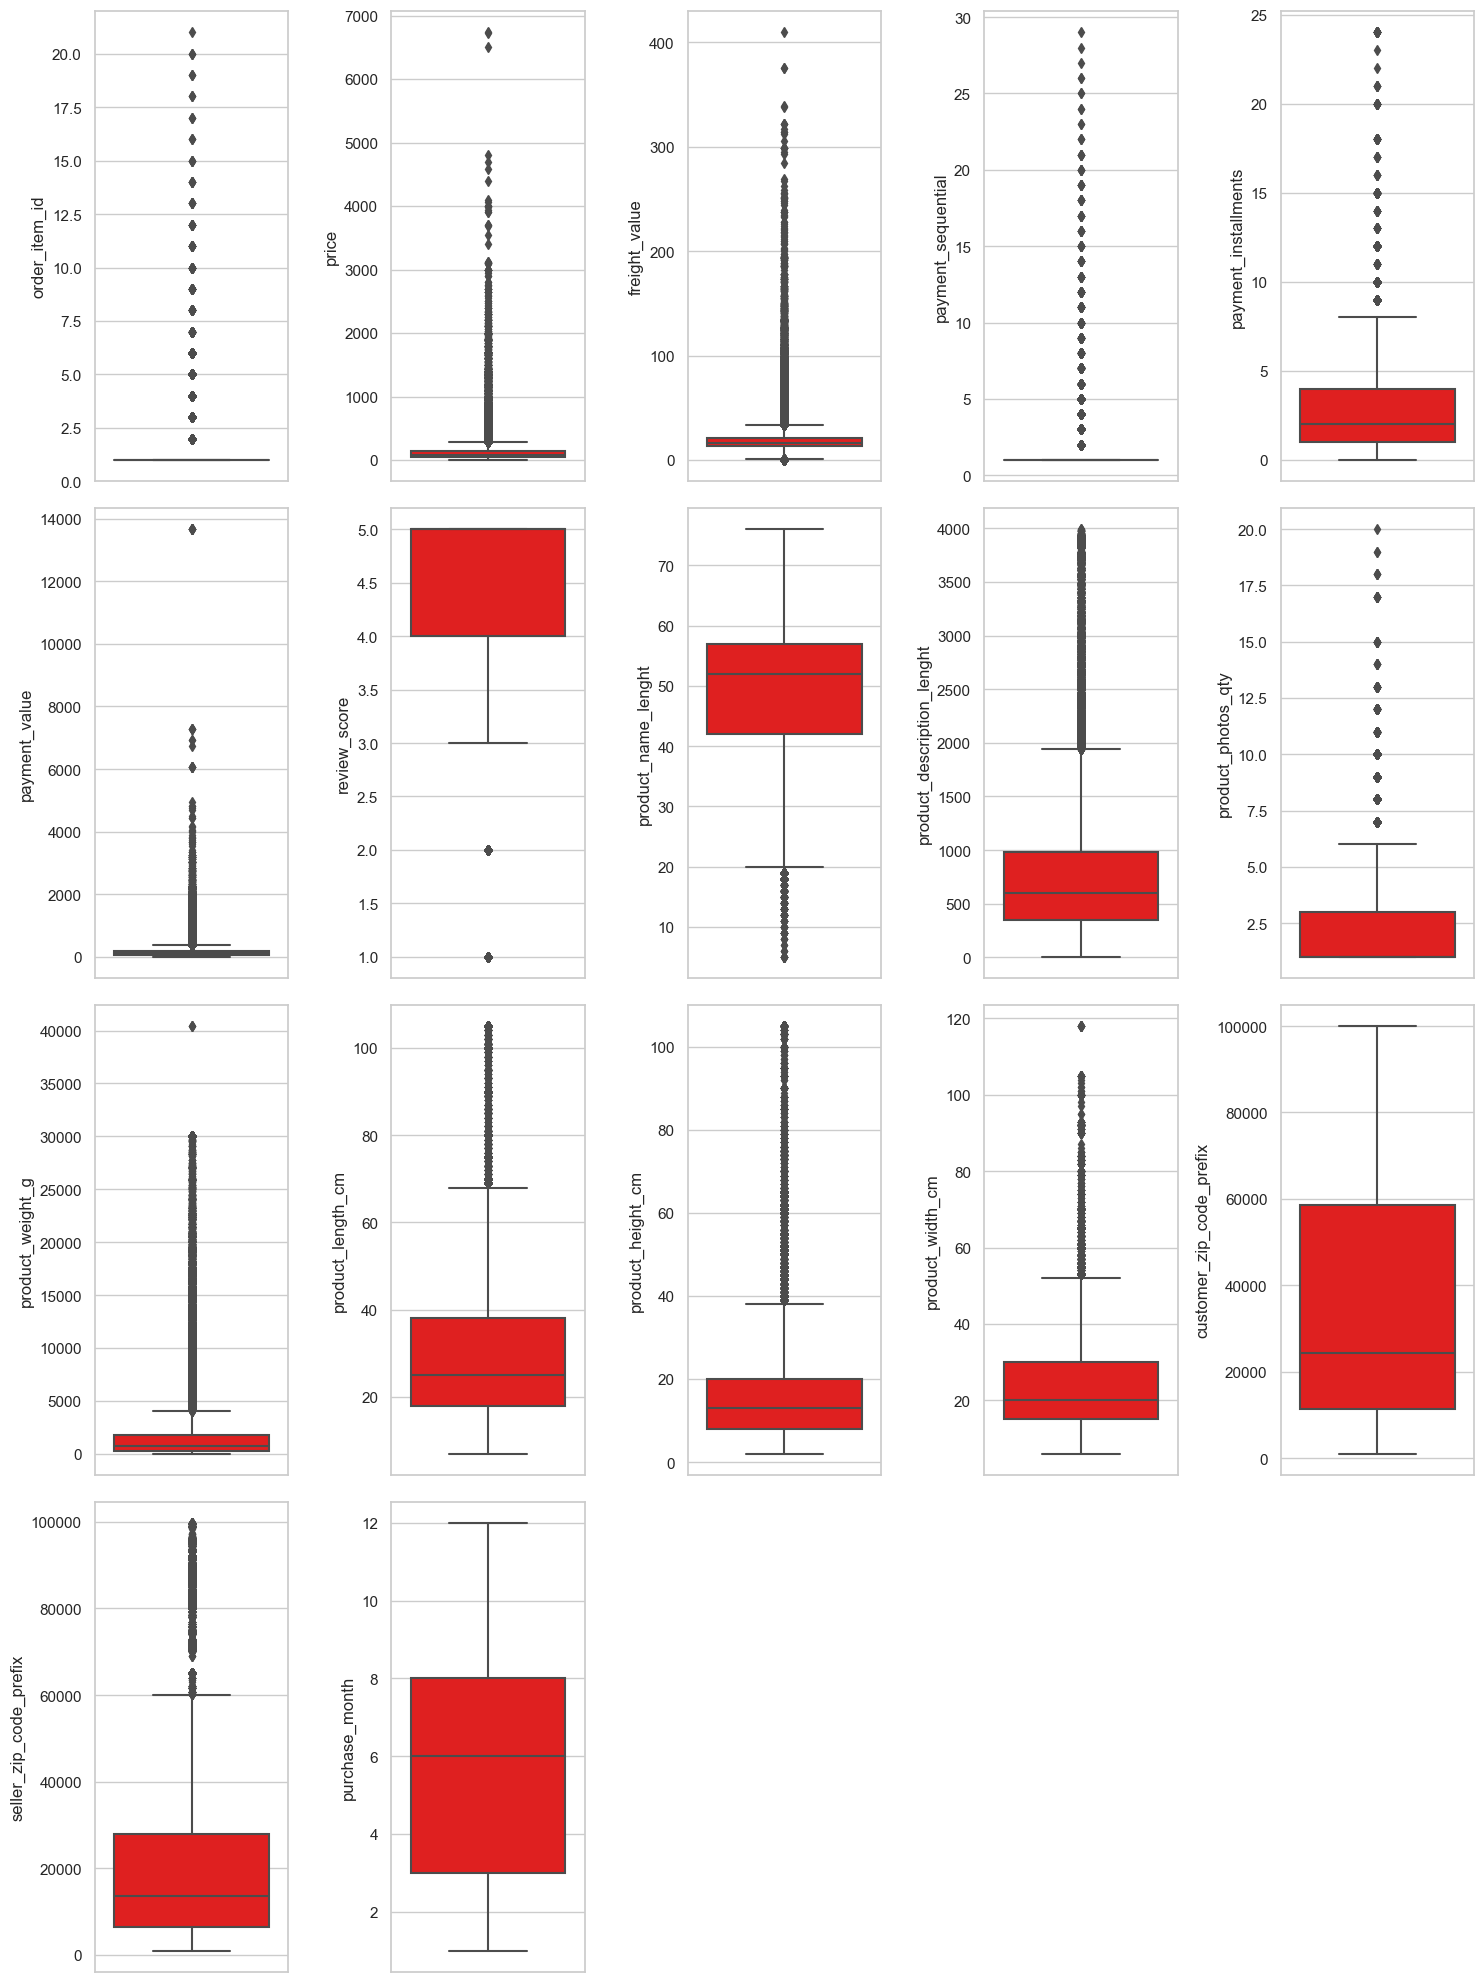

In [46]:
# Plotting
features = numericals

#Boxplot for numerical features
plt.figure(figsize=(15, 5 * ((len(features)-1) // 5 + 1)))


for i in range(len(features)):
    plt.subplot((len(features)-1) // 5 + 1, 5, i+1)
    sns.boxplot(y=merged_df[features[i]], color='red')

plt.tight_layout()

plt.show()

In [47]:
merged_df[numericals].describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,purchase_month
count,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,116600.000000,116600.000000,116600.000000,116600.000000,116600.000000,116600.000000,116600.000000,119143.000000,118310.000000,119143.000000
mean,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,48.767401,785.967144,2.205154,2115.560343,30.317230,16.646904,23.116355,35033.451298,24442.410413,6.033086
std,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,10.033529,652.586878,1.717458,3783.365701,16.221995,13.473632,11.757466,29823.198969,27573.004511,3.233819
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000,1.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,6429.000000,3.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,13660.000000,6.000000
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.250000,3.000000,1800.000000,38.000000,20.000000,30.000000,58475.000000,27972.000000,8.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,99730.000000,12.000000


# Preprocessing

## Cleaning Data

### Drop Some Features

In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  object        
 5   order_delivered_carrier_date   117057 non-null  object        
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  object        
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

In [49]:
#Drop unnecessary features
merged_df.drop(['review_id','review_comment_title','review_comment_message',
                'review_creation_date','review_answer_timestamp',
                'product_description_lenght','product_photos_qty',
                'product_length_cm','product_height_cm',
                'product_width_cm'], axis=1, inplace=True)

In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  object        
 5   order_delivered_carrier_date   117057 non-null  object        
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  object        
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

### Handling Missing Value

In [51]:
merged_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_score                      997
product_category_name            2543
product_name_lenght              2543
product_weight_g                 2543
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_c

In [52]:
missing_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100
print(missing_percentage)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.148561
order_delivered_carrier_date     1.750837
order_delivered_customer_date    2.871339
order_estimated_delivery_date    0.000000
order_item_id                    0.699160
product_id                       0.699160
seller_id                        0.699160
shipping_limit_date              0.699160
price                            0.699160
freight_value                    0.699160
payment_sequential               0.002518
payment_type                     0.002518
payment_installments             0.002518
payment_value                    0.002518
review_score                     0.836810
product_category_name            2.134410
product_name_lenght              2.134410
product_weight_g                 2.134410
customer_unique_id               0.000000
customer_zip_code_prefix         0

In [53]:
#Since missing value is less than 5% of data, hence we drop the missing value
merged_df.dropna(inplace=True)
print(f"There are {merged_df.isnull().sum().sum()} missing values.")

There are 0 missing values.


### Handling Duplicate Value

In [54]:
#Show amount of missing value
print(f"There are {merged_df.duplicated().sum()} duplicate rows.")

There are 405 duplicate rows.


In [55]:
#Hence need to drop the duplicate
merged_df = merged_df.drop_duplicates(keep='first')
print(f"Then there are {merged_df.duplicated().sum()} duplicate rows.")
print(f"Returned dataset has {merged_df.shape[0]} rows")

Then there are 0 duplicate rows.
Returned dataset has 112811 rows


# Recommendation System

## Splitting Repeat Customers & New Customers

In [56]:
#Identify customers with more than one occurrence (Repeat Customer)
repeat = merged_df.groupby('customer_unique_id').filter(lambda x: len(x) > 1)
repeat['repeat'] = 1
repeat.shape

(35013, 32)

In [57]:
#Identify customers with one occurrence (First Time Customer)
new = merged_df.groupby('customer_unique_id').filter(lambda x: len(x) == 1).reset_index(drop=True)
new['repeat'] = 0
new.shape

(77798, 32)

In [59]:
fullcombined_df = pd.concat((repeat, new), axis=0).reset_index(drop=True)

## Collaborative Filtering for Repeat Customers

### Preparing

#### Supply Dataframe for Surprise's built-in

To utilize Surprise's user-ratings matrix conversion, I supply a dataframe with three essential columns: user id, item id, and rating. The Surprise's will analyzing user preferences and generating personalized recommendations based on the provided ratings data.

In [60]:
#Feature Selection for Userids ('customer_unique_id'), Itemids ('product_id'), and Ratings ('review_score')
df_uir = repeat.groupby(['customer_unique_id','product_id'])['review_score'].agg(['mean']).reset_index()
df_uir = df_uir.rename({'mean':'estimator', 'product_id':'productId'}, axis=1)

In [61]:
df_uir.sort_values(by='estimator', ascending=False)

,customer_unique_id,productId,estimator
9947,819c65629034acc8a0e1c096c2c6715d,928e52a9ad53a294fdcc91bcf59d1751,5.0
11213,91dd7f1643bbaf4593c7fa25c29b9ac4,2d37d1dbcba865841a1c8cfab20ab9a1,5.0
11166,9177736727dc747f69fceccc193c125a,d74cff293606b10cc488bf29afb368ed,5.0
11167,9177736727dc747f69fceccc193c125a,fad4e554c85c77f187ef2c6744495d31,5.0
11172,917f89acc35bd14a9431b158236799a8,61447f1b201702e05090de1afd35c560,5.0
...,...,...,...
3218,2a106f11b8ddd823f56fdca06f043dbd,a03e40dea3abae7cadf374eda9afc2c3,1.0
13691,b0e9276c9a1616b659dba62a86625edb,90aa2ab699cd0e459be93124aa91c82f,1.0
13690,b0e9276c9a1616b659dba62a86625edb,7650dd3b2dc10798a8cbccc78d9e6e3b,1.0
13687,b0d60f871dec79cae101d9e74c816407,65223c26538a2226610efc437e488b77,1.0


#### Feature Scaling

In [62]:
# Scaling for Feature of Raw Rating
scale = (df_uir.estimator.min(), df_uir.estimator.max())
reader = Reader(rating_scale=scale)

In [63]:
#Load the dataframe
data = Dataset.load_from_df(df_uir[['customer_unique_id','productId', 'estimator']], reader)

In [64]:
#shuffle the user, item, rating for unbiased result
all_uir = data.raw_ratings
random.shuffle(all_uir)

In [65]:
#split data with ratio 80:20 into train (set A) and test data (set B)
threshold = int(0.8 * len(all_uir))
train_raw_uir = all_uir[:threshold]
test_raw_uir = all_uir[threshold:]

In [66]:
listed = [all_uir, train_raw_uir, test_raw_uir]
names = ['all_uir', 'train_raw_ratings', 'test_raw_ratings']

for i, lis in enumerate(listed):
    count = len(lis)
    print(f"Shape of {names[i]}: {count}")

Shape of all_uir: 19895
Shape of train_raw_ratings: 15916
Shape of test_raw_ratings: 3979


In [67]:
#insert train_raw_uir into data
data.raw_ratings = train_raw_uir

### Model Selection

In this notebook, I will use [Surprise](https://surpriselib.com/) library to make the recommendation system. Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.

To load a dataset from a pandas dataframe, we will use the load_from_df() method, we will also need a Reader object, and the rating_scale parameter must be specified. The dataframe must have three columns, corresponding to the user ids, the item ids, and the ratings in this order. Each row thus corresponds to a given rating.

#### Normal Predictor

In [68]:
#cross validation for train data
normpr = NormalPredictor()
np_result = cross_validate(normpr, data, measures=['RMSE'], cv=5, verbose=True, n_jobs=2)

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.9414  1.9557  1.9702  1.9243  1.9886  1.9560  0.0223  
Fit time          0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


In [69]:
#retrain whole train test (set A)
trainset = data.build_full_trainset()
normpr.fit(trainset)

# Compute RMSE on trainset (without fold)
np_pred_train = normpr.test(trainset.build_testset())
print('Train RMSE:')
np_rmse_train = accuracy.rmse(np_pred_train)

#load testset
testset = data.construct_testset(test_raw_uir)

#compute RMSE on testset
np_pred_test = normpr.test(testset)
print('Test RMSE:')
np_rmse_test = accuracy.rmse(np_pred_test)

Train RMSE:
RMSE: 1.9530
Test RMSE:
RMSE: 1.9398


#### SVD

In [70]:
#determine the parameter especially for learning rate and regularization
svd = SVD(n_factors=30, n_epochs=25, biased=True, lr_all=0.00004, reg_all=0.4, verbose=False, random_state=47)
#cross validation for train data
svd_result = cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True, n_jobs=2)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5546  1.5134  1.5042  1.5455  1.5164  1.5268  0.0196  
Fit time          0.08    0.07    0.07    0.07    0.07    0.07    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


In [71]:
#retrain whole train test (set A)
trainset = data.build_full_trainset()
svd.fit(trainset)

# Compute RMSE on trainset (without fold)
svd_pred_train = svd.test(trainset.build_testset())
print('Train RMSE:')
svd_rmse_train = accuracy.rmse(svd_pred_train)

#load testset
testset = data.construct_testset(test_raw_uir)

#compute RMSE on testset
svd_pred_test = svd.test(testset)
print('Test RMSE:')
svd_rmse_test = accuracy.rmse(svd_pred_test)

Train RMSE:
RMSE: 1.5234
Test RMSE:
RMSE: 1.5132


#### SVD ++

In [72]:
#determine the parameter especially for learning rate and regularization
svdpp = SVDpp(n_factors=50, n_epochs=20, lr_all=0.00008, reg_all=0.4, verbose=False, random_state=47)
#cross validation for train data
svdpp_result = cross_validate(svdpp, data, measures=['RMSE'], cv=5, verbose=True, n_jobs=2)

Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5375  1.5078  1.5338  1.5172  1.5372  1.5267  0.0120  
Fit time          0.15    0.16    0.15    0.16    0.14    0.15    0.01    
Test time         0.02    0.02    0.02    0.02    0.01    0.02    0.00    


In [73]:
#retrain whole train test (set A)
trainset = data.build_full_trainset()
svdpp.fit(trainset)

# Compute RMSE on trainset (without fold)
svdpp_pred_train = svdpp.test(trainset.build_testset())
print('Train RMSE:')
svdpp_rmse_train = accuracy.rmse(svdpp_pred_train)

#load testset
testset = data.construct_testset(test_raw_uir)

#compute RMSE on testset
svdpp_pred_test = svdpp.test(testset)
print('Test RMSE:')
svdpp_rmse_test = accuracy.rmse(svdpp_pred_test)

Train RMSE:
RMSE: 1.5191
Test RMSE:
RMSE: 1.5143


#### NMF

In [74]:
#determine the parameter especially for learning rate and regularization
nmf = NMF(n_factors=20, n_epochs=30, lr_bu=0.0000001, lr_bi=0.0000001, reg_pu=5, reg_qi=5, biased=True, random_state=47)
#cross validation for train data
nmf_result = cross_validate(nmf, data, measures=['RMSE'], cv=5, verbose=True, n_jobs=2)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5354  1.5237  1.5115  1.5365  1.5305  1.5275  0.0092  
Fit time          0.70    0.69    0.66    0.66    0.64    0.67    0.02    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


In [75]:
#retrain whole train test (set A)
trainset = data.build_full_trainset()
nmf.fit(trainset)

# Compute RMSE on trainset (without fold)
nmf_pred_train = nmf.test(trainset.build_testset())
print('Train RMSE:')
nmf_rmse_train = accuracy.rmse(nmf_pred_train)

#load testset
testset = data.construct_testset(test_raw_uir)

#compute RMSE on testset
nmf_pred_test = nmf.test(testset)
print('Test RMSE:')
nmf_rmse_test = accuracy.rmse(nmf_pred_test)

Train RMSE:
RMSE: 1.5275
Test RMSE:
RMSE: 1.5131


#### KNN Basic

In [76]:
#determine the parameter especially for finding k
knnb = KNNBasic(sim_options={'name': 'cosine', 'user_based': False}, verbose=False, random_state=47)
#cross validation for train data
knnb_result = cross_validate(knnb, data, measures=['RMSE'], cv=5, verbose=True, n_jobs=2)

Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5043  1.5054  1.4953  1.5002  1.4896  1.4990  0.0059  
Fit time          0.99    0.98    0.71    0.74    0.46    0.78    0.20    
Test time         0.02    0.02    0.02    0.02    0.03    0.02    0.00    


In [77]:
#retrain whole train test (set A)
trainset = data.build_full_trainset()
knnb.fit(trainset)

# Compute RMSE on trainset (without fold)
knnb_pred_train = knnb.test(trainset.build_testset())
print('Train RMSE:')
knnb_rmse_train = accuracy.rmse(knnb_pred_train)

#load testset
testset = data.construct_testset(test_raw_uir)

#compute RMSE on testset
knnb_pred_test = knnb.test(testset)
print('Test RMSE:')
knnb_rmse_test = accuracy.rmse(knnb_pred_test)

Train RMSE:
RMSE: 0.3027
Test RMSE:
RMSE: 1.4708


#### Co-Clustering

In [78]:
#determine the parameter especially for finding k
coc = CoClustering(n_cltr_u=8, n_cltr_i=8, n_epochs=30, random_state=47)
#cross validation for train data
coc_result = cross_validate(coc, data, measures=['RMSE'], cv=5, verbose=True, n_jobs=2)

Evaluating RMSE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4436  1.4701  1.4741  1.4248  1.4369  1.4499  0.0191  
Fit time          1.60    1.58    1.58    1.58    1.55    1.58    0.02    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


In [79]:
#retrain whole train test (set A)
trainset = data.build_full_trainset()
coc.fit(trainset)

# Compute RMSE on trainset (without fold)
coc_pred_train = coc.test(trainset.build_testset())
print('Train RMSE:')
coc_rmse_train = accuracy.rmse(coc_pred_train)

#load testset
testset = data.construct_testset(test_raw_uir)

#compute RMSE on testset
coc_pred_test = coc.test(testset)
print('Test RMSE:')
coc_rmse_test = accuracy.rmse(coc_pred_test)

Train RMSE:
RMSE: 0.4099
Test RMSE:
RMSE: 1.4148


#### Slope One

In [80]:
#cross validation for train data
so = SlopeOne()
so_result = cross_validate(so, data, measures=['RMSE'], cv=5, verbose=True, n_jobs=2)

Evaluating RMSE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4201  1.3944  1.4240  1.4144  1.4169  1.4140  0.0103  
Fit time          0.82    0.78    0.43    0.55    0.42    0.60    0.17    
Test time         0.02    0.02    0.04    0.04    0.01    0.03    0.01    


In [81]:
#retrain whole train test (set A)
trainset = data.build_full_trainset()
so.fit(trainset)

# Compute RMSE on trainset (without fold)
so_pred_train = so.test(trainset.build_testset())
print('Train RMSE:')
so_rmse_train = accuracy.rmse(so_pred_train)

#load testset
testset = data.construct_testset(test_raw_uir)

#compute RMSE on testset
so_pred_test = so.test(testset)
print('Test RMSE:')
so_rmse_test = accuracy.rmse(so_pred_test)

Train RMSE:
RMSE: 0.0356
Test RMSE:
RMSE: 1.3702


### Model Evaluation Recap

In [82]:
rec_rmses = [[np_rmse_train, np_rmse_test],
             [svd_rmse_train, svd_rmse_test],
             [svdpp_rmse_train, svd_rmse_test],
             [nmf_rmse_train, nmf_rmse_test],
             [knnb_rmse_train, knnb_rmse_test],
             [coc_rmse_train, coc_rmse_test],
             [so_rmse_train, so_rmse_test]]
    
rec_model_names = ['normalpred', 'SVD', 'SVD++', 'NMF','KNNBasic','CoClustering','SlopeOne']
df_comparison = pd.DataFrame(rec_rmses, index=rec_model_names)
df_comparison.rename(columns = {0:'RMSE train', 1:'RMSE test'}, inplace = True)

In [83]:
#Comaparison RMSE train and RMSE test of 7 models
df_comparison.T

,normalpred,SVD,SVD++,NMF,KNNBasic,CoClustering,SlopeOne
RMSE train,1.953044,1.523386,1.519055,1.527452,0.302666,0.409888,0.035610
RMSE test,1.939800,1.513225,1.513225,1.513092,1.470767,1.414831,1.370222


In [84]:
#Pick the best model
df_comparison['RMSE diff'] = np.abs(df_comparison['RMSE train'] - df_comparison['RMSE test'])
filtered_df = df_comparison[df_comparison['RMSE diff'] <= 0.1]
min_rmse_train = filtered_df['RMSE train'].min()
model = filtered_df.loc[filtered_df['RMSE train'].idxmin()]
print(model)

RMSE train    1.519055
RMSE test     1.513225
RMSE diff     0.005830
Name: SVD++, dtype: float64


From 7 models, SlopeOne might be has lowest RMSE of train but it seems overfitting because of the RMSE of test is high. Hence I select SVD++ as the best model that has relatively lowest RMSE values for both the the training and testing sets also good fitting with minimum difference between them. For further process SVD++ will be optimized more to gain the best performance of model.

### Tuning The Chosen Model

#### Load Data

In [85]:
# Scaling for Feature of Raw Rating
scale = (df_uir.estimator.min(), df_uir.estimator.max())
reader = Reader(rating_scale=scale)
#Load the dataframe
data = Dataset.load_from_df(df_uir[['customer_unique_id','productId', 'estimator']], reader)

#### Tuning SVD++

In [86]:
#Finding Best Parameter for SVD
param_grid = {'n_factors': [25, 50, 100],'n_epochs': [20,30,50],
              'lr_all': [0.002, 0.005,0.01],'reg_all':[0.02,0.1, 0.4]}

gs_svdpp = GridSearchCV(SVDpp, param_grid, measures=['rmse'], cv=5)
gs_svdpp.fit(data)

best_score_svdpp = gs_svdpp.best_score['rmse']
best_param_svdpp = gs_svdpp.best_params['rmse']

In [87]:
results_df_svdpp = pd.DataFrame.from_dict(gs_svdpp.cv_results)
results_df_svdpp.T

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
split0_test_rmse,1.504159,1.503126,1.503751,1.469138,1.468493,1.468447,1.426611,1.424669,1.427989,1.48994,...,1.424525,1.474526,1.474103,1.473908,1.440607,1.433571,1.432823,1.420153,1.41508,1.40404
split1_test_rmse,1.487322,1.487131,1.487143,1.450378,1.4517,1.451189,1.409834,1.411734,1.411902,1.473917,...,1.41162,1.460881,1.459894,1.45816,1.426981,1.420051,1.419151,1.412031,1.397867,1.387974
split2_test_rmse,1.496219,1.495817,1.49575,1.462466,1.461747,1.463556,1.421708,1.424805,1.427134,1.483299,...,1.423241,1.469477,1.468359,1.470026,1.43911,1.431699,1.430878,1.419361,1.410913,1.404617
split3_test_rmse,1.491656,1.492428,1.4906,1.455196,1.454857,1.456235,1.412068,1.413099,1.414321,1.47728,...,1.411,1.464566,1.463579,1.462283,1.425314,1.42096,1.420034,1.407275,1.400195,1.39115
split4_test_rmse,1.478807,1.480248,1.479381,1.440338,1.442155,1.442101,1.399653,1.39797,1.401101,1.465881,...,1.397809,1.45224,1.448831,1.449591,1.415762,1.409755,1.405197,1.396596,1.387149,1.37696
mean_test_rmse,1.491632,1.49175,1.491325,1.455503,1.45579,1.456306,1.413975,1.414455,1.416489,1.478063,...,1.413639,1.464338,1.462953,1.462794,1.429555,1.423207,1.421617,1.411083,1.402241,1.392948
std_test_rmse,0.008497,0.007747,0.008181,0.009907,0.008948,0.009251,0.009438,0.009924,0.010081,0.008181,...,0.009719,0.007597,0.008517,0.008624,0.009255,0.008666,0.009895,0.008673,0.009911,0.010419
rank_test_rmse,74,75,73,46,48,51,23,24,25,64,...,22,62,60,59,33,32,31,21,16,10
mean_fit_time,0.146533,0.120996,0.128765,0.118012,0.11978,0.119796,0.124787,0.120051,0.119184,0.204628,...,0.488835,0.729647,0.681531,0.666418,0.66794,0.682674,0.677642,0.670912,0.679279,0.667281
std_fit_time,0.042015,0.005661,0.00537,0.002241,0.003529,0.004438,0.012109,0.004317,0.005141,0.071599,...,0.032562,0.0489,0.014407,0.003896,0.007211,0.01425,0.021291,0.004262,0.006467,0.005803


In [88]:
print(f'Best score: {best_score_svdpp}')
print(f'Best parameter: {best_param_svdpp}')

Best score: 1.3605494076785944
Best parameter: {'n_factors': 25, 'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1}


In [89]:
#retrain whole train test (set A)
svdpp_tuning = gs_svdpp.best_estimator['rmse']
trainset = data.build_full_trainset()
svdpp_tuning.fit(trainset)

# Compute RMSE on trainset (without fold)
svdpp_pred_train_t = svdpp_tuning.test(trainset.build_testset())
print('Train RMSE & MAE:')
svdpp_rmse_train_t = accuracy.rmse(svdpp_pred_train_t)
svdpp_mae_train_t = accuracy.mae(svdpp_pred_train_t)

#load testset
testset = data.construct_testset(test_raw_uir)

#compute RMSE on testset
svdpp_pred_test_t = svdpp_tuning.test(testset)
print('Test RMSE & MAE:')
svdpp_rmse_test_t = accuracy.rmse(svdpp_pred_test_t)
svdpp_mae_test_t = accuracy.mae(svdpp_pred_test_t)

Train RMSE & MAE:
RMSE: 0.3210
MAE:  0.2593
Test RMSE & MAE:
RMSE: 0.3248
MAE:  0.2616


Before the tuning SVD++ has RMSE train of 1.517 and RMSE test of 1.524. After tuning SVD++ has RMSE train 0.321 and RMSE test 0.318.
The model has achieved a significant improvement with lower RMSE values on both train and test set. Futhermore the model needs to be evaluated.

### Evaluating The Recommender for Repeat Customer

In [90]:
# Let's build a pandas dataframe with all the predictions

def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

recommendation_results = pd.DataFrame(svdpp_pred_test_t, columns=['uid', 'iid', 'rui', 'est', 'details'])
#recommendation_results = pd.DataFrame(svdpp_pred_test_t, columns=['customerid', 'productid', 'actual', 'predicted', 'details'])  
recommendation_results['Iu'] = recommendation_results.uid.apply(get_Iu)
recommendation_results['Ui'] = recommendation_results.iid.apply(get_Ui)
recommendation_results['err'] = abs(recommendation_results.est - recommendation_results.rui)

In [91]:
best_predictions = recommendation_results.sort_values(by='err')[:20]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
887,6541e9e4338ae47c96d25fa8d839efd1,9ecadb84c81da840dbf3564378b586e9,5.0,5.0,{'was_impossible': False},2,34,0.0
1815,f1e73ad158b38954c23f5668894b3d46,95320d70592f898880af9c3d5394728c,5.0,5.0,{'was_impossible': False},2,2,0.0
3277,11919542cd2080bad74c41346d04f996,6c2fe5434c020b8dbca31fc36b64a2d1,5.0,5.0,{'was_impossible': False},2,2,0.0
1634,9484a5c41bc2e68c0a8f9c45d1d8c9bc,656e6ea7d86cf0008e67b693d33cc357,5.0,5.0,{'was_impossible': False},2,3,0.0
389,74cb1ad7e6d5674325c1f99b5ea30d82,0b814a3c8fa6dbb849df7c28c1bd6831,5.0,5.0,{'was_impossible': False},5,2,0.0
2003,a900ff99a192cbaf6ae8e867a95117a3,ca5c923962558430573f83661dbe36d6,5.0,5.0,{'was_impossible': False},2,5,0.0
3529,7cb20dd79b4b5bfda52b712000a30de5,eefb750a45a4ba505ffd4813ecaf2b18,5.0,5.0,{'was_impossible': False},3,3,0.0
80,19f735a9a58a187253055f9d4bcc2bb6,e343a7fbf868e28cb3f80ef0f6d9300c,5.0,5.0,{'was_impossible': False},2,2,0.0
2768,0b6d4f036c07e10854affe43fc4e718c,9f14f401fce2d9ddd450e7ce60cb7f5f,5.0,5.0,{'was_impossible': False},3,2,0.0
1500,32fb60e2ce6a1f62eeccbc2d33046072,fb19ac22e32dfecea21afbdde4b97b5f,5.0,5.0,{'was_impossible': False},2,3,0.0


Product_id of the top one "bf66f5d110af02b50af37038afe90bd9" was rated by 2 users. User "4f82360423c19895d2a8183e6d8ec701" rated 1, the SVD++ predicts the user would rate 1. Furthermore, for the rest of it, have quite good with error 0.

In [92]:
worst_predictions = recommendation_results.sort_values(by='err')[-20:]
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
3413,cd2c2791abc01e590e41af297238ef86,3cb39171fd36c50097f2dedbbe0dfe6e,1.0,2.023581,{'was_impossible': False},1,4,1.023581
3816,35c636d4e43216044ff512852a93fc48,6a1a04054158fe995e1688d8f79605b2,1.0,2.026408,{'was_impossible': False},1,5,1.026408
468,fa85ae3dc73255346ac079efddf056da,261244fc4d0197d8772346872f5b0f5e,1.0,2.027502,{'was_impossible': False},1,4,1.027502
398,0526ed43dbc2198ab355d10ebc4b6a35,d2c277a6bd8e9119fa1a84c70f3eab5d,1.0,2.033197,{'was_impossible': False},1,3,1.033197
1156,9fef2dbca8b07a59a6c522d610700cc1,e1e932dfb67414e80b87ad97688cf2a3,2.0,3.037187,{'was_impossible': False},1,5,1.037187
1562,d18227b7809322199605d38e81ec230d,47cd48073d67f91f09cb5ef9496c920b,1.0,2.050115,{'was_impossible': False},1,5,1.050115
3727,ff34c08907d0c7fc61e906ed427f5377,d59349a33fcba18707a61aa852c02c5b,1.0,2.059653,{'was_impossible': False},1,5,1.059653
1310,7a1751f98e25f665fc0130c7b001e18f,154e7e31ebfa092203795c972e5804a6,1.0,2.064336,{'was_impossible': False},2,57,1.064336
2727,d4cfcbffecd24af269cf47885448de53,aa95bee0592e05d2ef533b8e5b7236b3,5.0,3.913336,{'was_impossible': False},1,3,1.086664
712,8ec06d1380850ea7498b48e8997630b3,169e1fedd1319ca92e90e057e7123005,1.0,2.098206,{'was_impossible': False},1,5,1.098206


Product_id of the bottom one "b0c8da302d49498d2ce6be8c631e4e20" was rated by 9 users. User "9099c659f8cd764e87a1482d258fcec9" rated 1, the SVD++ predicts the user would rate 2.505.

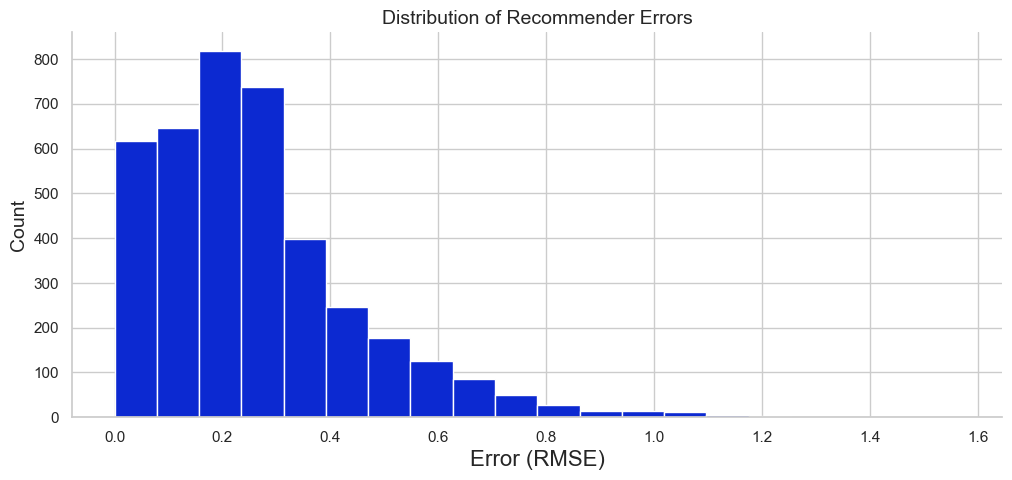

In [93]:
# plot model error
plt.figure(figsize=(12,5))
plt.hist(recommendation_results.err, color='#0C29D1', bins=20)
plt.xlabel('Error (RMSE)', size=16)
plt.ylabel('Count', size=14)
plt.title('Distribution of Recommender Errors', size=14)
sns.despine();

For the general, the model has skewed right distribution with RMSE is tend to 0.2 which the model have the good prediction for rating.

In [94]:
def means_per_rating_group(dataset):
    real_over_three = dataset[dataset.rui > 3].err
    real_three_under = dataset[dataset.rui <= 3].err
    
    print("Overall recommendation system mean error:", dataset.err.mean())
    print("Mean error for products where user rates above 3:", real_over_three.mean())
    print("Mean error for products where user rates below 3:", real_three_under.mean())
    
    return real_over_three, real_three_under

real_over_three, real_three_under = means_per_rating_group(recommendation_results)

Overall recommendation system mean error: 0.26163795994128897
Mean error for products where user rates above 3: 0.21654445530813532
Mean error for products where user rates below 3: 0.3605469071021332


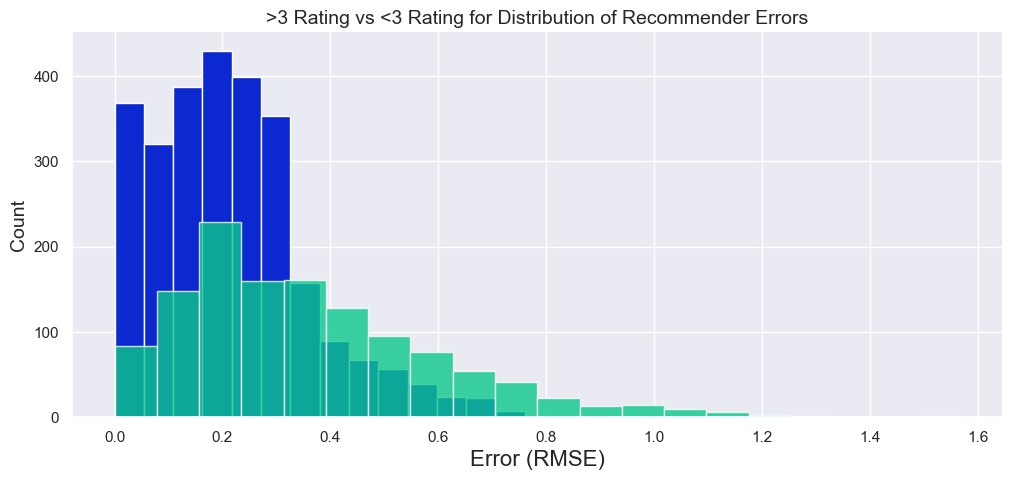

In [149]:
# plot the recommendation system mean for users who rate products higher than 3 and lower than 3
plt.figure(figsize=(12,5))
plt.hist(real_over_three, bins=20, color='#0C29D1', label='Actual Rating >3')
plt.hist(real_three_under, bins=20, color='#0CC78B', alpha=.8, label='Actual Rating <=3')
plt.xlabel('Error (RMSE)', size=16)
plt.ylabel('Count', size=14)
plt.title('>3 Rating vs <3 Rating for Distribution of Recommender Errors', size=14)
sns.despine();

For users that rated above 3, the model has skewed right distribution with RMSE is tend to 0.2. Meanwhile for users that rate below below 3 has count of below it and has same RMSE tend to 0.2 but a little longer tail.

## Simple Recommender for New Customers

### Top 5 Popular Products Recommendation

In [96]:
def find_pop_n_products(data, n):
    grouping = data.groupby(['product_id', 'product_category_name']).agg(num_product=('product_id', 'count'))
    sorted_group = grouping.sort_values(by='num_product', ascending=False).reset_index()
    top_n_products = sorted_group[['product_id', 'product_category_name']].head(n)
    print(f"Top {n} items:\n {top_n_products}")

In [97]:
#Testing Recommendation for the product
recommendation = find_pop_n_products(merged_df, 5)

Top 5 items:
                          product_id product_category_name
0  aca2eb7d00ea1a7b8ebd4e68314663af     Furniture & Decor
1  99a4788cb24856965c36a24e339b6058     Bed, Table & Bath
2  422879e10f46682990de24d770e7f83d        Tools & Garden
3  389d119b48cf3043d311335e499d9c6b        Tools & Garden
4  368c6c730842d78016ad823897a372db        Tools & Garden


Top 5 categories of product that could be used to First-Time Customer are:
1. Furniture & Decor
2. Bed, Table & Bath
3. Tools & Garden.

### Top 5 Product in State Recommendation

In [37]:
def find_pop_products(data, uid, n):
    state = data[data['customer_unique_id']==uid].customer_state.max()
    city = data[data['customer_unique_id']==uid].customer_city.max()
    state_loc = data[data['customer_state'] == state]
    state_based = state_loc.groupby(['product_id', 'product_category_name']).agg(num_product=('product_id', 'count'))
    sorted_group_s = state_based.sort_values(by='num_product', ascending=False).reset_index()
    top_n_products_s = sorted_group_s[['product_id', 'product_category_name']].head(n)
    
    print(f"Top {n} trending products around you ({state}, {city}):\n {top_n_products_s}")

In [15]:
#Random pick a new customer
random_cust_new = random.choice(new['customer_unique_id'])
print(f'Customerid: {random_cust_new}')

#Testing Recommendation for the product
find_pop_products(merged_df, random_cust_new, 5)

Customerid: cfe262da3bb5a3c77b6580f2b788a3dd
Top 5 trending products around you (RJ, volta redonda):
                          product_id    product_category_name
0  d1c427060a0f73f6b889a5c7c61f2ac4  Computers & Accessories
1  99a4788cb24856965c36a24e339b6058        Bed, Table & Bath
2  422879e10f46682990de24d770e7f83d           Tools & Garden
3  53b36df67ebb7c41585e8d54d6772e08          Watches & Gifts
4  53759a2ecddad2bb87a079a1f1519f73           Tools & Garden


Meanwhile for other recommendation could do based on customer's state. For the example customer with id of cfe262da3bb5a3c77b6580f2b788a3dd in the state of RJ on city of volta redonda has top 5 trending products with categories around such as:
1. Computer & Accessories
2. Bed, Table & Bath
3. Tools & Garden

# Conclusion

Conclusion:
The analysis reveals three key problems for the Olist. Firstly, a significant 80% of transaction value is generated from only 17 categories of products (20%), indicating there’s still potential products in the remaining 34 categories. Secondly, there is a urgent issue with bad ratings in the top 17 categories, which may lead to customer dissatisfaction and impact customer retention. Thirdly, there’re still 78% first-time customer that bought 1 product instead of repeat customer that bought 2-3 products

Recommendations:
1. Implement a recommendation system that leverages collaborative filtering, specifically the SVD++ algorithm. This approach will provide personalized product recommendations based on user-to-product data, improving the overall customer experience and driving sales. 
2. Try to solve the issue of bad ratings by identifying the underlying causes. Causes might be from product quality, delivery, customer support, or other factors affecting customer satisfaction. Resolving these issues would help retain loyal customers.
3. Since there’re still a lot first-time customer than repeat customer, overcome the cold-start problem for first-time customers with two strategies. Firstly, implement a Top 10 Popular Products Recommendation to guide customers towards popular products. Secondly, implement a Top 10 Product in State Recommendation to offer products that are specifically popular in the customer's state. These approaches would increase the likelihood of repeat purchases and contributing data collection from the customer.

# References

* https://www.moyak.com/papers/collaborative-filtering.html
* https://developers.google.com/machine-learning/recommendation/collaborative/basics
* https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0
* https://towardsdatascience.com/recsys-series-part-4-the-7-variants-of-matrix-factorization-for-collaborative-filtering-368754e4fab5
* https://towardsdatascience.com/collaborative-filtering-and-embeddings-part-1-63b00b9739ce
* https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0
* https://www.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/
* https://www.stat.ipb.ac.id/main/wp-content/uploads/2021/01/Introduction-to-RecSys_BERT4Rec-IPB.pdf
* https://medium.datadriveninvestor.com/how-to-build-a-recommendation-system-for-purchase-data-step-by-step-d6d7a78800b6
* https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise
* https://towardsdatascience.com/a-simple-approach-to-building-a-recommendation-system-d0f4de1a1f50e-step-by-step-d4ba702ef80b
* https://celikkam.medium.com/surprise-recommender-library-few-lines-for-everything-d2de3ceac3d4
* https://heartbeat.comet.ml/recommender-systems-with-python-part-i-content-based-filtering-5df4940bd831
* https://towardsdatascience.com/tf-idf-simplified-aba19d5f5530
* https://towardsdatascience.com/recommendation-system-series-part-1-an-executive-guide-to-building-recommendation-system-608f83e2630a